# Comparing PR Handling in FOSS Commununities

In this notebook we study how different Free & Open-Source Software (FOSS) communities handle Pull Requests (PRs). In particular, we compare how _protective_, _equitable_ and _lenient_ FOSS communities are in handling PRs. [NOTE: Maybe here some examples of what each of these categories mean at a high level]. 

To this end, we have collected information related to PR handling from members of the following FOSS communities [NOTE: reference to the study]:

* FOSSASIA
* Odoo
* DuckDuckGo
* Linux Kernel
* Coala
* ROS
* Plone
* ReactJS
* AngularJS
* NodeJS
* OpenGenus
* Mozilla
* OpenSUSE
* jQuery
* Apache
* Other


## Classification

We are interested in comparing how _protective_, _equitable_ and _lenient_ the different communities are. Below we precisely describe the criteria to classify a community within a category.

### Protective

A community is classified as “Protective” when the response from this community is positive in at least one of these variables V28 (“I don't consider a pull request/patch, unless I trust the contributor”), V29 (“I don't consider a pull request/patch, unless the contributor is reliable.”), and V30 (“I don't consider a pull request/patch, unless I have a strong relationship with the contributor.”). It is possible that positive evaluations of V27 (“In general I  say no to most pull requests (PR)/patches”) can be included in this evaluation too.

### Equitable

A community is classified as “Equitable” when the response from this community is positive in at least one of these variables V31 (“I assess every pull request/patch in the same manner irrespective of the contributor.”), V32 (“I assess pull requests/patches purely on technical grounds.”).  The equitability in community is expected to find positive answers on V31, V32 which have different tone compared to V33 (“I never say no to a pull request/patch. If the quality of the PR/patch is not mergeable, then I mentor the contributor to elevate his/her PR/patch to a mergeable state.”) in question.

### Lenient

A community is classified as “Lenient” when the response from this community is positive V33 (“I never say no to a pull request/patch. If the quality of the PR/patch is not mergeable, then I mentor the contributor to elevate his/her PR/patch to a mergeable state.”).

### Answers 

The participants in the survey selected a mark from the likert scale below to answer each question:

1. Strongly Agree
2. Agree
3. Neutral
4. Disagree
5. Strongly Diasgree


**Remark**: In this study we consider that a community is _positive_ on a variable if the questions of the community are concentrated on strongly agree, agree or neutral. [NOTE: Perhaps here we should say why we choose this threshold]

### Summary

This table summaries the variables we study for each category. For a category $c \in \{\mathit{protective, equitable, lenient}\}$ and the set of variables for that category (denoted as $V_c$), we say that a community is $c$ iff it is positive (see remark above) to either of the questions in $V_c$. For instance, we say that a community is _lenient_ iff it is positive to either _V31_ or _V32_.


| Category   | ID   | Variable                                                                                                           |
|------------|------|--------------------------------------------------------------------------------------------------------------------|
| Protective |      |                                                                                                                    |
|            | V28  | I don't consider a pull request/patch, unless I trust the contributor.                                             |
|            | V29  | I don't consider a pull request/patch, unless the contributor is reliable.                                         |
|            | V30  | I don't consider a pull request/patch, unless I have a strong relationship with the contributor.                   |
|            | V27^ | In general I  say no to most pull requests (PR)/patches”) can be included in this evaluation too.                  |
| Equitable  |      |                                                                                                                    |
|            | V31  | I assess every pull request/patch in the same manner irrespective of the contributor.                              |
|            | V32  | I assess pull requests/patches purely on technical grounds.                                                        |
| Lenient    |      |                                                                                                                    |
|            | V33  | I never say no to a pull request/patch. I mentor the contributor to elevate his/her PR/patch to a mergeable state. |

^ Variable V27 is optional in comparing protectiveness. However, it can be used to get additional information (see [Protective](#Protective) above).


---

[NOTE: Editing the table above in codelab is a pain. The editor provides no support whatsoever for editing markdown tables. My current approach is to edit the table in emacs and copy/paste it here. If you would like to edit the table, I recommend that you copy the table to a markdown editor with support for tables, make some edits, and then copy it back.]

[NOTE: The summary is written in a language that it is useful for me. But my immediate guess is that the TSE community will not appreciate this formulation. So I leave it to you guys to present it in a more TSE friendly manner. Nevertheless, I find the table clarifying.]

## Hypotheses

In what follows we analyze the veracity of the following hypotheses:

* **H1:** The Linux Kernel community adopts a protective style of governance for its code change process.

* **H2:** The FOSSASIA community adopts an equitable style of governance for its pull request process.

* **H3:** The Odoo community adopts an equitable style of governance for its pull request process.

* **H4:** The DuckDuckGo community adopts a linient style of governance for its pull request process.

* **H5:** The Coala community adopts a linient style of governance for its pull request process.

* **H6:** Each FOSS community adopts a governance style, either protective, equitable or linient, for its pull request process.

* **H7 (BONUS):** The Coala Community is more lenient than the Linux Kernel Community

## Bayesian Data Analysis and Hypothesis Testing

In order to test the hypoteses above (see [Hypotehses](#Hypoteses)), we use Bayesian inference to estimate the underlying distributions of the answers that each FOSS community gives to each of the variables defined above.

We assume that the answers to the questions are [normaly distributed](https://en.wikipedia.org/wiki/Normal_distribution) over the possible answers (see [answers](#Answers)). Hence, we use a Bayesian model with normal distributions as a likelihood functions—i.e., the distribution of the data in Bayesian jargon. We set a very uninformative and flexible prior so that we let the inference engine obtain the underlying distribuion of the answers for each community.

Once we have obtained the distributions for each variable of each community we use different techniques to test our hypotheses. These techniques will be discussed in detailed below.

We use PyMC3 to perform our analyses.

In what follows, we first load the data and inialize the libraries used for the analysis, and, later, we present a section per hypothesis describing the model and the code to test the veracity of the hypothesis.

###  Initialization

**Little technical note:** In case you have problems with arviz+pymc3. Just run the cell below.

You will be abel to detect issues if running the imports cell (two cells below) gives you an error.

In [ ]:
!pip install arviz
!pip install git+https://github.com/pymc-devs/pymc3

#### Imports

Here we simply import all the libraries we need for our analysis.

[NOTE: If you think it is necessary I can explain what each library is for]

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc3 as pm
from matplotlib import pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Loading the data

We read the data from the pseudonymized data set and filter it by
community. The dataset contains the answers of each participants to questions (variables) from V27 to V33. Each cell in the dataset contains an integer value in $\{-1\} \cup [1,5]$ where $-1$ means that the participant didn't answer the question, $1$ means strongly agree, $2$ agree, and so on.

In order to protect the identity of the participants we have striped out identifiable information from the original dataset. Concretely, unique identfiers and textual answers. This modification has no effect in the results as those data are irrelevant.

Run the cell below to get a preview of the dataset.

In [2]:
df = pd.read_csv('pseudonymized-data.csv')

### In case the file 'pseudonymized-data.csv' disappears, comment the lines above, and use the code below to upload it again
# from google.colab import files
# import io
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['pseudonymized-data.csv']))

# Show a preview of the data
df

,Community,V27,V28,V29,V30,V31,V32,V33
0,Comm.FOSSASIA,4,4,4,5,1,1,1
1,Comm.FOSSASIA,5,5,5,5,1,1,1
2,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
3,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
4,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
382,Comm.OpenSUSE,3,5,5,5,2,1,4
383,Comm.ROS,5,5,5,5,2,2,3
384,Comm.Plone,4,5,5,4,4,4,3
385,Comm.Linux_Kernel,-1,-1,-1,-1,-1,-1,-1


### H1: The Linux Kernel community adopts a protective style of governance for its code change process

Here we analyze the veracity of hypothesis H1.

#### Data

Here we simply load the data we analyze, i.e., answers to question V33 by the Coala community.

In [3]:
## Just showing that all answer to V33 by duckduck go are -1
Community = 'Comm.Linux_Kernel'
v27 = df[(df.Community == Community) & (df.V27 != -1)].V27
v28 = df[(df.Community == Community) & (df.V28 != -1)].V28
v29 = df[(df.Community == Community) & (df.V29 != -1)].V29
v30 = df[(df.Community == Community) & (df.V30 != -1)].V30

#### Model

To study this hypothesis, we estimate the distribution of the answers
to questions V27-V30 by participants of the Linux Kernel community. As mentioned earlier, we assume that the data form a [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution). We estimate the distribution for the answers to each question separately. We
set
[uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
priors on the parameters of the normal distributions—from
$1$ to $5$ for the mean, and $0$ to $10$ for the standard
deviation. Finally we check whether the answers are positive to any of the questions above. That is, whether the participants reply in the range neutral, agree or strongly agree.


In [4]:
with pm.Model() as protective_linux_kernel:
  μ27 = pm.Uniform('μ27', lower=1, upper=5)
  μ28 = pm.Uniform('μ28', lower=1, upper=5)
  μ29 = pm.Uniform('μ29', lower=1, upper=5)
  μ30 = pm.Uniform('μ30', lower=1, upper=5)

  σ27 = pm.Uniform('σ27', lower=0, upper=4)
  σ28 = pm.Uniform('σ28', lower=0, upper=4)
  σ29 = pm.Uniform('σ29', lower=0, upper=4)
  σ30 = pm.Uniform('σ30', lower=0, upper=4)

  obs27 = pm.Normal('obs27',mu=μ27,sigma=σ27,observed=v27)
  obs28 = pm.Normal('obs28',mu=μ28,sigma=σ28,observed=v28)
  obs29 = pm.Normal('obs29',mu=μ29,sigma=σ29,observed=v29)
  obs30 = pm.Normal('obs30',mu=μ30,sigma=σ30,observed=v30)

#### Sampling

In [5]:
with protective_linux_kernel:
  trace_protective_linux_kernel = pm.sample(10000,cores=2)
  ppc_protective_linux_kernel = pm.sample_posterior_predictive(trace_protective_linux_kernel, 
                                                               samples=5000, 
                                                               model=protective_linux_kernel)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [σ30, σ29, σ28, σ27, μ30, μ29, μ28, μ27]


Sampling 2 chains:   0%|          | 0/21000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 46/21000 [00:00<00:46, 451.95draws/s]

Sampling 2 chains:   0%|          | 92/21000 [00:00<00:46, 453.28draws/s]

Sampling 2 chains:   1%|          | 162/21000 [00:00<00:41, 505.75draws/s]

Sampling 2 chains:   1%|          | 243/21000 [00:00<00:36, 569.47draws/s]

Sampling 2 chains:   1%|▏         | 310/21000 [00:00<00:34, 595.83draws/s]

Sampling 2 chains:   2%|▏         | 390/21000 [00:00<00:32, 643.54draws/s]

Sampling 2 chains:   2%|▏         | 491/21000 [00:00<00:28, 720.78draws/s]

Sampling 2 chains:   3%|▎         | 601/21000 [00:00<00:25, 803.79draws/s]

Sampling 2 chains:   3%|▎         | 708/21000 [00:00<00:23, 866.87draws/s]

Sampling 2 chains:   4%|▍         | 810/21000 [00:01<00:22, 906.16draws/s]

Sampling 2 chains:   4%|▍         | 905/21000 [00:01<00:22, 882.23draws/s]

Sampling 2 chains:   5%|▍         | 1010/21000 [00:01<00:21, 926.51draws/s]

Sampling 2 chains:   5%|▌         | 1112/21000 [00:01<00:20, 950.64draws/s]

Sampling 2 chains:   6%|▌         | 1221/21000 [00:01<00:20, 985.32draws/s]

Sampling 2 chains:   6%|▋         | 1336/21000 [00:01<00:19, 1028.78draws/s]

Sampling 2 chains:   7%|▋         | 1444/21000 [00:01<00:18, 1040.20draws/s]

Sampling 2 chains:   7%|▋         | 1550/21000 [00:01<00:18, 1042.03draws/s]

Sampling 2 chains:   8%|▊         | 1657/21000 [00:01<00:18, 1047.24draws/s]

Sampling 2 chains:   8%|▊         | 1774/21000 [00:01<00:17, 1080.42draws/s]

Sampling 2 chains:   9%|▉         | 1883/21000 [00:02<00:18, 1049.79draws/s]

Sampling 2 chains:   9%|▉         | 1989/21000 [00:02<00:18, 1018.40draws/s]

Sampling 2 chains:  10%|▉         | 2092/21000 [00:02<00:19, 979.11draws/s] 

Sampling 2 chains:  10%|█         | 2201/21000 [00:02<00:18, 1009.68draws/s]

Sampling 2 chains:  11%|█         | 2308/21000 [00:02<00:18, 1026.07draws/s]

Sampling 2 chains:  11%|█▏        | 2412/21000 [00:02<00:18, 998.22draws/s] 

Sampling 2 chains:  12%|█▏        | 2518/21000 [00:02<00:18, 1015.63draws/s]

Sampling 2 chains:  12%|█▏        | 2621/21000 [00:02<00:18, 1001.74draws/s]

Sampling 2 chains:  13%|█▎        | 2737/21000 [00:02<00:17, 1043.06draws/s]

Sampling 2 chains:  14%|█▎        | 2847/21000 [00:02<00:17, 1058.24draws/s]

Sampling 2 chains:  14%|█▍        | 2954/21000 [00:03<00:18, 997.33draws/s] 

Sampling 2 chains:  15%|█▍        | 3055/21000 [00:03<00:18, 976.87draws/s]

Sampling 2 chains:  15%|█▌        | 3154/21000 [00:03<00:18, 966.31draws/s]

Sampling 2 chains:  15%|█▌        | 3252/21000 [00:03<00:18, 950.89draws/s]

Sampling 2 chains:  16%|█▌        | 3348/21000 [00:03<00:20, 852.62draws/s]

Sampling 2 chains:  16%|█▋        | 3436/21000 [00:03<00:20, 840.84draws/s]

Sampling 2 chains:  17%|█▋        | 3523/21000 [00:03<00:20, 848.57draws/s]

Sampling 2 chains:  17%|█▋        | 3610/21000 [00:03<00:21, 827.84draws/s]

Sampling 2 chains:  18%|█▊        | 3722/21000 [00:03<00:19, 896.15draws/s]

Sampling 2 chains:  18%|█▊        | 3814/21000 [00:04<00:19, 889.52draws/s]

Sampling 2 chains:  19%|█▊        | 3919/21000 [00:04<00:18, 931.05draws/s]

Sampling 2 chains:  19%|█▉        | 4017/21000 [00:04<00:17, 944.04draws/s]

Sampling 2 chains:  20%|█▉        | 4116/21000 [00:04<00:17, 957.12draws/s]

Sampling 2 chains:  20%|██        | 4218/21000 [00:04<00:17, 973.72draws/s]

Sampling 2 chains:  21%|██        | 4320/21000 [00:04<00:16, 985.43draws/s]

Sampling 2 chains:  21%|██        | 4431/21000 [00:04<00:16, 1018.14draws/s]

Sampling 2 chains:  22%|██▏       | 4536/21000 [00:04<00:16, 1026.20draws/s]

Sampling 2 chains:  22%|██▏       | 4649/21000 [00:04<00:15, 1053.22draws/s]

Sampling 2 chains:  23%|██▎       | 4755/21000 [00:05<00:16, 986.74draws/s] 

Sampling 2 chains:  23%|██▎       | 4855/21000 [00:05<00:16, 988.23draws/s]

Sampling 2 chains:  24%|██▎       | 4955/21000 [00:05<00:16, 974.58draws/s]

Sampling 2 chains:  24%|██▍       | 5059/21000 [00:05<00:16, 991.88draws/s]

Sampling 2 chains:  25%|██▍       | 5166/21000 [00:05<00:15, 1012.31draws/s]

Sampling 2 chains:  25%|██▌       | 5268/21000 [00:05<00:16, 967.76draws/s] 

Sampling 2 chains:  26%|██▌       | 5366/21000 [00:05<00:16, 967.39draws/s]

Sampling 2 chains:  26%|██▌       | 5464/21000 [00:05<00:16, 952.08draws/s]

Sampling 2 chains:  26%|██▋       | 5560/21000 [00:05<00:16, 933.22draws/s]

Sampling 2 chains:  27%|██▋       | 5662/21000 [00:05<00:16, 957.14draws/s]

Sampling 2 chains:  27%|██▋       | 5759/21000 [00:06<00:16, 915.50draws/s]

Sampling 2 chains:  28%|██▊       | 5868/21000 [00:06<00:15, 960.05draws/s]

Sampling 2 chains:  28%|██▊       | 5966/21000 [00:06<00:16, 927.16draws/s]

Sampling 2 chains:  29%|██▉       | 6069/21000 [00:06<00:15, 954.14draws/s]

Sampling 2 chains:  29%|██▉       | 6166/21000 [00:06<00:16, 919.34draws/s]

Sampling 2 chains:  30%|██▉       | 6269/21000 [00:06<00:15, 947.57draws/s]

Sampling 2 chains:  30%|███       | 6368/21000 [00:06<00:15, 958.23draws/s]

Sampling 2 chains:  31%|███       | 6468/21000 [00:06<00:14, 970.32draws/s]

Sampling 2 chains:  31%|███▏      | 6566/21000 [00:06<00:14, 966.55draws/s]

Sampling 2 chains:  32%|███▏      | 6666/21000 [00:07<00:14, 973.77draws/s]

Sampling 2 chains:  32%|███▏      | 6764/21000 [00:07<00:15, 931.85draws/s]

Sampling 2 chains:  33%|███▎      | 6877/21000 [00:07<00:14, 982.00draws/s]

Sampling 2 chains:  33%|███▎      | 6984/21000 [00:07<00:13, 1005.84draws/s]

Sampling 2 chains:  34%|███▎      | 7086/21000 [00:07<00:13, 997.46draws/s] 

Sampling 2 chains:  34%|███▍      | 7187/21000 [00:07<00:14, 930.82draws/s]

Sampling 2 chains:  35%|███▍      | 7284/21000 [00:07<00:14, 941.71draws/s]

Sampling 2 chains:  35%|███▌      | 7383/21000 [00:07<00:14, 954.86draws/s]

Sampling 2 chains:  36%|███▌      | 7480/21000 [00:07<00:15, 888.70draws/s]

Sampling 2 chains:  36%|███▌      | 7582/21000 [00:07<00:14, 922.23draws/s]

Sampling 2 chains:  37%|███▋      | 7679/21000 [00:08<00:14, 935.09draws/s]

Sampling 2 chains:  37%|███▋      | 7780/21000 [00:08<00:13, 953.87draws/s]

Sampling 2 chains:  38%|███▊      | 7880/21000 [00:08<00:13, 966.20draws/s]

Sampling 2 chains:  38%|███▊      | 7981/21000 [00:08<00:13, 976.33draws/s]

Sampling 2 chains:  38%|███▊      | 8084/21000 [00:08<00:13, 990.88draws/s]

Sampling 2 chains:  39%|███▉      | 8184/21000 [00:08<00:12, 991.86draws/s]

Sampling 2 chains:  39%|███▉      | 8284/21000 [00:08<00:13, 944.26draws/s]

Sampling 2 chains:  40%|████      | 8400/21000 [00:08<00:12, 999.14draws/s]

Sampling 2 chains:  40%|████      | 8502/21000 [00:08<00:13, 958.14draws/s]

Sampling 2 chains:  41%|████      | 8600/21000 [00:09<00:13, 947.04draws/s]

Sampling 2 chains:  41%|████▏     | 8709/21000 [00:09<00:12, 985.20draws/s]

Sampling 2 chains:  42%|████▏     | 8809/21000 [00:09<00:12, 956.34draws/s]

Sampling 2 chains:  42%|████▏     | 8906/21000 [00:09<00:12, 936.38draws/s]

Sampling 2 chains:  43%|████▎     | 9005/21000 [00:09<00:12, 950.32draws/s]

Sampling 2 chains:  43%|████▎     | 9103/21000 [00:09<00:12, 955.78draws/s]

Sampling 2 chains:  44%|████▍     | 9199/21000 [00:09<00:12, 912.26draws/s]

Sampling 2 chains:  44%|████▍     | 9304/21000 [00:09<00:12, 946.02draws/s]

Sampling 2 chains:  45%|████▍     | 9402/21000 [00:09<00:12, 953.55draws/s]

Sampling 2 chains:  45%|████▌     | 9499/21000 [00:09<00:12, 958.42draws/s]

Sampling 2 chains:  46%|████▌     | 9602/21000 [00:10<00:11, 978.30draws/s]

Sampling 2 chains:  46%|████▌     | 9701/21000 [00:10<00:11, 975.57draws/s]

Sampling 2 chains:  47%|████▋     | 9799/21000 [00:10<00:11, 975.53draws/s]

Sampling 2 chains:  47%|████▋     | 9905/21000 [00:10<00:11, 997.30draws/s]

Sampling 2 chains:  48%|████▊     | 10005/21000 [00:10<00:11, 992.48draws/s]

Sampling 2 chains:  48%|████▊     | 10108/21000 [00:10<00:10, 1001.13draws/s]

Sampling 2 chains:  49%|████▊     | 10209/21000 [00:10<00:11, 971.12draws/s] 

Sampling 2 chains:  49%|████▉     | 10307/21000 [00:10<00:11, 900.59draws/s]

Sampling 2 chains:  50%|████▉     | 10399/21000 [00:10<00:12, 870.99draws/s]

Sampling 2 chains:  50%|█████     | 10505/21000 [00:11<00:11, 916.87draws/s]

Sampling 2 chains:  51%|█████     | 10606/21000 [00:11<00:11, 942.75draws/s]

Sampling 2 chains:  51%|█████     | 10715/21000 [00:11<00:10, 980.30draws/s]

Sampling 2 chains:  52%|█████▏    | 10817/21000 [00:11<00:10, 989.53draws/s]

Sampling 2 chains:  52%|█████▏    | 10917/21000 [00:11<00:10, 987.23draws/s]

Sampling 2 chains:  52%|█████▏    | 11017/21000 [00:11<00:10, 982.61draws/s]

Sampling 2 chains:  53%|█████▎    | 11116/21000 [00:11<00:10, 967.31draws/s]

Sampling 2 chains:  53%|█████▎    | 11214/21000 [00:11<00:10, 936.35draws/s]

Sampling 2 chains:  54%|█████▍    | 11314/21000 [00:11<00:10, 953.58draws/s]

Sampling 2 chains:  54%|█████▍    | 11415/21000 [00:11<00:09, 968.64draws/s]

Sampling 2 chains:  55%|█████▍    | 11513/21000 [00:12<00:09, 968.03draws/s]

Sampling 2 chains:  55%|█████▌    | 11611/21000 [00:12<00:09, 966.80draws/s]

Sampling 2 chains:  56%|█████▌    | 11708/21000 [00:12<00:09, 958.93draws/s]

Sampling 2 chains:  56%|█████▌    | 11805/21000 [00:12<00:10, 861.27draws/s]

Sampling 2 chains:  57%|█████▋    | 11894/21000 [00:12<00:10, 859.42draws/s]

Sampling 2 chains:  57%|█████▋    | 11994/21000 [00:12<00:10, 895.06draws/s]

Sampling 2 chains:  58%|█████▊    | 12095/21000 [00:12<00:09, 926.42draws/s]

Sampling 2 chains:  58%|█████▊    | 12189/21000 [00:12<00:09, 917.08draws/s]

Sampling 2 chains:  59%|█████▊    | 12301/21000 [00:12<00:08, 967.44draws/s]

Sampling 2 chains:  59%|█████▉    | 12400/21000 [00:13<00:09, 940.81draws/s]

Sampling 2 chains:  60%|█████▉    | 12496/21000 [00:13<00:09, 887.86draws/s]

Sampling 2 chains:  60%|██████    | 12606/21000 [00:13<00:08, 938.52draws/s]

Sampling 2 chains:  61%|██████    | 12711/21000 [00:13<00:08, 967.49draws/s]

Sampling 2 chains:  61%|██████    | 12810/21000 [00:13<00:09, 900.90draws/s]

Sampling 2 chains:  61%|██████▏   | 12903/21000 [00:13<00:09, 867.37draws/s]

Sampling 2 chains:  62%|██████▏   | 13014/21000 [00:13<00:08, 926.63draws/s]

Sampling 2 chains:  62%|██████▎   | 13125/21000 [00:13<00:08, 973.56draws/s]

Sampling 2 chains:  63%|██████▎   | 13235/21000 [00:13<00:07, 1007.92draws/s]

Sampling 2 chains:  64%|██████▎   | 13338/21000 [00:13<00:07, 1014.07draws/s]

Sampling 2 chains:  64%|██████▍   | 13441/21000 [00:14<00:07, 1014.35draws/s]

Sampling 2 chains:  64%|██████▍   | 13544/21000 [00:14<00:07, 1008.74draws/s]

Sampling 2 chains:  65%|██████▍   | 13646/21000 [00:14<00:07, 995.30draws/s] 

Sampling 2 chains:  65%|██████▌   | 13753/21000 [00:14<00:07, 1015.97draws/s]

Sampling 2 chains:  66%|██████▌   | 13858/21000 [00:14<00:06, 1023.53draws/s]

Sampling 2 chains:  66%|██████▋   | 13961/21000 [00:14<00:07, 956.95draws/s] 

Sampling 2 chains:  67%|██████▋   | 14067/21000 [00:14<00:07, 982.62draws/s]

Sampling 2 chains:  67%|██████▋   | 14167/21000 [00:14<00:07, 906.06draws/s]

Sampling 2 chains:  68%|██████▊   | 14262/21000 [00:14<00:07, 918.39draws/s]

Sampling 2 chains:  68%|██████▊   | 14356/21000 [00:15<00:07, 912.11draws/s]

Sampling 2 chains:  69%|██████▉   | 14449/21000 [00:15<00:07, 887.66draws/s]

Sampling 2 chains:  69%|██████▉   | 14545/21000 [00:15<00:07, 907.98draws/s]

Sampling 2 chains:  70%|██████▉   | 14648/21000 [00:15<00:06, 938.37draws/s]

Sampling 2 chains:  70%|███████   | 14746/21000 [00:15<00:06, 950.43draws/s]

Sampling 2 chains:  71%|███████   | 14842/21000 [00:15<00:06, 941.24draws/s]

Sampling 2 chains:  71%|███████   | 14943/21000 [00:15<00:06, 958.02draws/s]

Sampling 2 chains:  72%|███████▏  | 15040/21000 [00:15<00:06, 937.61draws/s]

Sampling 2 chains:  72%|███████▏  | 15146/21000 [00:15<00:06, 967.84draws/s]

Sampling 2 chains:  73%|███████▎  | 15254/21000 [00:15<00:05, 995.92draws/s]

Sampling 2 chains:  73%|███████▎  | 15355/21000 [00:16<00:06, 933.56draws/s]

Sampling 2 chains:  74%|███████▎  | 15455/21000 [00:16<00:05, 951.66draws/s]

Sampling 2 chains:  74%|███████▍  | 15552/21000 [00:16<00:05, 925.27draws/s]

Sampling 2 chains:  75%|███████▍  | 15646/21000 [00:16<00:05, 912.78draws/s]

Sampling 2 chains:  75%|███████▌  | 15756/21000 [00:16<00:05, 961.23draws/s]

Sampling 2 chains:  76%|███████▌  | 15860/21000 [00:16<00:05, 982.22draws/s]

Sampling 2 chains:  76%|███████▌  | 15960/21000 [00:16<00:05, 959.16draws/s]

Sampling 2 chains:  76%|███████▋  | 16061/21000 [00:16<00:05, 971.93draws/s]

Sampling 2 chains:  77%|███████▋  | 16159/21000 [00:16<00:04, 969.94draws/s]

Sampling 2 chains:  77%|███████▋  | 16257/21000 [00:17<00:04, 965.43draws/s]

Sampling 2 chains:  78%|███████▊  | 16360/21000 [00:17<00:04, 981.69draws/s]

Sampling 2 chains:  78%|███████▊  | 16459/21000 [00:17<00:04, 972.36draws/s]

Sampling 2 chains:  79%|███████▉  | 16557/21000 [00:17<00:04, 972.30draws/s]

Sampling 2 chains:  79%|███████▉  | 16655/21000 [00:17<00:04, 885.28draws/s]

Sampling 2 chains:  80%|███████▉  | 16761/21000 [00:17<00:04, 929.32draws/s]

Sampling 2 chains:  80%|████████  | 16868/21000 [00:17<00:04, 967.02draws/s]

Sampling 2 chains:  81%|████████  | 16969/21000 [00:17<00:04, 979.16draws/s]

Sampling 2 chains:  81%|████████▏ | 17069/21000 [00:17<00:04, 981.25draws/s]

Sampling 2 chains:  82%|████████▏ | 17168/21000 [00:18<00:03, 961.70draws/s]

Sampling 2 chains:  82%|████████▏ | 17269/21000 [00:18<00:03, 974.99draws/s]

Sampling 2 chains:  83%|████████▎ | 17367/21000 [00:18<00:03, 976.38draws/s]

Sampling 2 chains:  83%|████████▎ | 17469/21000 [00:18<00:03, 984.89draws/s]

Sampling 2 chains:  84%|████████▎ | 17569/21000 [00:18<00:03, 988.71draws/s]

Sampling 2 chains:  84%|████████▍ | 17669/21000 [00:18<00:03, 971.71draws/s]

Sampling 2 chains:  85%|████████▍ | 17767/21000 [00:18<00:03, 950.13draws/s]

Sampling 2 chains:  85%|████████▌ | 17864/21000 [00:18<00:03, 955.91draws/s]

Sampling 2 chains:  86%|████████▌ | 17960/21000 [00:18<00:03, 923.41draws/s]

Sampling 2 chains:  86%|████████▌ | 18053/21000 [00:18<00:03, 858.42draws/s]

Sampling 2 chains:  86%|████████▋ | 18150/21000 [00:19<00:03, 889.00draws/s]

Sampling 2 chains:  87%|████████▋ | 18249/21000 [00:19<00:03, 916.31draws/s]

Sampling 2 chains:  87%|████████▋ | 18345/21000 [00:19<00:02, 927.44draws/s]

Sampling 2 chains:  88%|████████▊ | 18444/21000 [00:19<00:02, 939.90draws/s]

Sampling 2 chains:  88%|████████▊ | 18539/21000 [00:19<00:02, 905.70draws/s]

Sampling 2 chains:  89%|████████▊ | 18631/21000 [00:19<00:02, 901.58draws/s]

Sampling 2 chains:  89%|████████▉ | 18728/21000 [00:19<00:02, 920.31draws/s]

Sampling 2 chains:  90%|████████▉ | 18823/21000 [00:19<00:02, 927.93draws/s]

Sampling 2 chains:  90%|█████████ | 18923/21000 [00:19<00:02, 944.51draws/s]

Sampling 2 chains:  91%|█████████ | 19022/21000 [00:19<00:02, 956.53draws/s]

Sampling 2 chains:  91%|█████████ | 19120/21000 [00:20<00:01, 962.79draws/s]

Sampling 2 chains:  92%|█████████▏| 19217/21000 [00:20<00:01, 963.40draws/s]

Sampling 2 chains:  92%|█████████▏| 19316/21000 [00:20<00:01, 970.56draws/s]

Sampling 2 chains:  92%|█████████▏| 19414/21000 [00:20<00:01, 935.37draws/s]

Sampling 2 chains:  93%|█████████▎| 19510/21000 [00:20<00:01, 941.38draws/s]

Sampling 2 chains:  93%|█████████▎| 19613/21000 [00:20<00:01, 963.74draws/s]

Sampling 2 chains:  94%|█████████▍| 19718/21000 [00:20<00:01, 987.03draws/s]

Sampling 2 chains:  94%|█████████▍| 19818/21000 [00:20<00:01, 957.08draws/s]

Sampling 2 chains:  95%|█████████▍| 19915/21000 [00:20<00:01, 894.78draws/s]

Sampling 2 chains:  95%|█████████▌| 20006/21000 [00:21<00:01, 794.38draws/s]

Sampling 2 chains:  96%|█████████▌| 20089/21000 [00:21<00:01, 712.42draws/s]

Sampling 2 chains:  96%|█████████▌| 20164/21000 [00:21<00:01, 682.34draws/s]

Sampling 2 chains:  96%|█████████▋| 20236/21000 [00:21<00:01, 663.56draws/s]

Sampling 2 chains:  97%|█████████▋| 20305/21000 [00:21<00:01, 669.77draws/s]

Sampling 2 chains:  97%|█████████▋| 20374/21000 [00:21<00:00, 666.65draws/s]

Sampling 2 chains:  97%|█████████▋| 20443/21000 [00:21<00:00, 671.88draws/s]

Sampling 2 chains:  98%|█████████▊| 20511/21000 [00:21<00:00, 645.07draws/s]

Sampling 2 chains:  98%|█████████▊| 20577/21000 [00:21<00:00, 617.31draws/s]

Sampling 2 chains:  98%|█████████▊| 20640/21000 [00:22<00:00, 607.61draws/s]

Sampling 2 chains:  99%|█████████▊| 20702/21000 [00:22<00:00, 588.44draws/s]

Sampling 2 chains:  99%|█████████▉| 20762/21000 [00:22<00:00, 582.12draws/s]

Sampling 2 chains:  99%|█████████▉| 20821/21000 [00:22<00:00, 563.38draws/s]

Sampling 2 chains:  99%|█████████▉| 20878/21000 [00:22<00:00, 561.35draws/s]

Sampling 2 chains: 100%|█████████▉| 20935/21000 [00:22<00:00, 547.88draws/s]

Sampling 2 chains: 100%|█████████▉| 20991/21000 [00:22<00:00, 529.00draws/s]

Sampling 2 chains: 100%|██████████| 21000/21000 [00:22<00:00, 921.40draws/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:00<11:23,  7.31it/s]

  1%|          | 32/5000 [00:00<08:00, 10.34it/s]

  1%|▏         | 63/5000 [00:00<05:38, 14.57it/s]

  2%|▏         | 94/5000 [00:00<04:00, 20.40it/s]

  3%|▎         | 127/5000 [00:00<02:51, 28.38it/s]

  3%|▎         | 160/5000 [00:00<02:03, 39.05it/s]

  4%|▍         | 192/5000 [00:00<01:30, 52.96it/s]

  4%|▍         | 225/5000 [00:00<01:07, 70.75it/s]

  5%|▌         | 258/5000 [00:00<00:51, 92.52it/s]

  6%|▌         | 291/5000 [00:01<00:39, 117.93it/s]

  6%|▋         | 323/5000 [00:01<00:32, 145.18it/s]

  7%|▋         | 355/5000 [00:01<00:26, 172.71it/s]

  8%|▊         | 388/5000 [00:01<00:22, 201.45it/s]

  8%|▊         | 421/5000 [00:01<00:20, 227.47it/s]

  9%|▉         | 453/5000 [00:01<00:18, 246.68it/s]

 10%|▉         | 485/5000 [00:01<00:17, 262.24it/s]

 10%|█         | 517/5000 [00:01<00:16, 271.02it/s]

 11%|█         | 548/5000 [00:01<00:15, 279.41it/s]

 12%|█▏        | 579/5000 [00:01<00:15, 287.20it/s]

 12%|█▏        | 610/5000 [00:02<00:15, 288.42it/s]

 13%|█▎        | 641/5000 [00:02<00:15, 289.10it/s]

 13%|█▎        | 672/5000 [00:02<00:14, 293.56it/s]

 14%|█▍        | 703/5000 [00:02<00:14, 296.92it/s]

 15%|█▍        | 735/5000 [00:02<00:14, 302.15it/s]

 15%|█▌        | 768/5000 [00:02<00:13, 309.22it/s]

 16%|█▌        | 802/5000 [00:02<00:13, 315.74it/s]

 17%|█▋        | 836/5000 [00:02<00:12, 320.70it/s]

 17%|█▋        | 869/5000 [00:02<00:12, 321.95it/s]

 18%|█▊        | 903/5000 [00:03<00:12, 326.08it/s]

 19%|█▊        | 937/5000 [00:03<00:12, 328.88it/s]

 19%|█▉        | 971/5000 [00:03<00:12, 330.08it/s]

 20%|██        | 1005/5000 [00:03<00:12, 331.97it/s]

 21%|██        | 1039/5000 [00:03<00:11, 331.16it/s]

 21%|██▏       | 1073/5000 [00:03<00:12, 324.29it/s]

 22%|██▏       | 1106/5000 [00:03<00:12, 311.92it/s]

 23%|██▎       | 1138/5000 [00:03<00:12, 307.75it/s]

 23%|██▎       | 1170/5000 [00:03<00:12, 308.75it/s]

 24%|██▍       | 1202/5000 [00:03<00:12, 309.15it/s]

 25%|██▍       | 1233/5000 [00:04<00:12, 309.21it/s]

 25%|██▌       | 1264/5000 [00:04<00:12, 308.96it/s]

 26%|██▌       | 1295/5000 [00:04<00:12, 307.84it/s]

 27%|██▋       | 1326/5000 [00:04<00:11, 306.78it/s]

 27%|██▋       | 1357/5000 [00:04<00:12, 301.35it/s]

 28%|██▊       | 1389/5000 [00:04<00:11, 304.70it/s]

 28%|██▊       | 1421/5000 [00:04<00:11, 308.06it/s]

 29%|██▉       | 1452/5000 [00:04<00:11, 308.16it/s]

 30%|██▉       | 1483/5000 [00:04<00:11, 299.05it/s]

 30%|███       | 1513/5000 [00:04<00:11, 291.73it/s]

 31%|███       | 1543/5000 [00:05<00:12, 283.94it/s]

 32%|███▏      | 1581/5000 [00:05<00:11, 305.97it/s]

 32%|███▏      | 1618/5000 [00:05<00:10, 320.80it/s]

 33%|███▎      | 1655/5000 [00:05<00:10, 332.72it/s]

 34%|███▍      | 1693/5000 [00:05<00:09, 345.42it/s]

 35%|███▍      | 1730/5000 [00:05<00:09, 349.77it/s]

 35%|███▌      | 1767/5000 [00:05<00:09, 352.97it/s]

 36%|███▌      | 1803/5000 [00:05<00:09, 353.58it/s]

 37%|███▋      | 1839/5000 [00:05<00:09, 347.01it/s]

 37%|███▋      | 1874/5000 [00:06<00:09, 342.75it/s]

 38%|███▊      | 1909/5000 [00:06<00:09, 336.74it/s]

 39%|███▉      | 1943/5000 [00:06<00:09, 326.36it/s]

 40%|███▉      | 1976/5000 [00:06<00:09, 314.92it/s]

 40%|████      | 2008/5000 [00:06<00:09, 301.09it/s]

 41%|████      | 2039/5000 [00:06<00:10, 293.09it/s]

 41%|████▏     | 2070/5000 [00:06<00:09, 294.75it/s]

 42%|████▏     | 2102/5000 [00:06<00:09, 301.07it/s]

 43%|████▎     | 2136/5000 [00:06<00:09, 311.25it/s]

 43%|████▎     | 2170/5000 [00:06<00:08, 317.86it/s]

 44%|████▍     | 2209/5000 [00:07<00:08, 336.25it/s]

 45%|████▍     | 2246/5000 [00:07<00:07, 344.63it/s]

 46%|████▌     | 2283/5000 [00:07<00:07, 349.73it/s]

 46%|████▋     | 2323/5000 [00:07<00:07, 361.51it/s]

 47%|████▋     | 2360/5000 [00:07<00:07, 363.37it/s]

 48%|████▊     | 2399/5000 [00:07<00:07, 370.26it/s]

 49%|████▉     | 2438/5000 [00:07<00:06, 375.06it/s]

 50%|████▉     | 2476/5000 [00:07<00:06, 371.34it/s]

 50%|█████     | 2514/5000 [00:07<00:06, 369.95it/s]

 51%|█████     | 2553/5000 [00:08<00:06, 374.37it/s]

 52%|█████▏    | 2592/5000 [00:08<00:06, 376.94it/s]

 53%|█████▎    | 2630/5000 [00:08<00:06, 341.42it/s]

 53%|█████▎    | 2665/5000 [00:08<00:07, 322.70it/s]

 54%|█████▍    | 2698/5000 [00:08<00:07, 323.61it/s]

 55%|█████▍    | 2731/5000 [00:08<00:07, 323.45it/s]

 55%|█████▌    | 2768/5000 [00:08<00:06, 334.04it/s]

 56%|█████▌    | 2806/5000 [00:08<00:06, 345.53it/s]

 57%|█████▋    | 2842/5000 [00:08<00:06, 347.27it/s]

 58%|█████▊    | 2877/5000 [00:08<00:06, 340.31it/s]

 58%|█████▊    | 2912/5000 [00:09<00:06, 339.69it/s]

 59%|█████▉    | 2947/5000 [00:09<00:06, 334.75it/s]

 60%|█████▉    | 2982/5000 [00:09<00:05, 336.92it/s]

 60%|██████    | 3016/5000 [00:09<00:05, 336.10it/s]

 61%|██████    | 3050/5000 [00:09<00:05, 337.19it/s]

 62%|██████▏   | 3084/5000 [00:09<00:05, 335.30it/s]

 62%|██████▏   | 3118/5000 [00:09<00:05, 334.32it/s]

 63%|██████▎   | 3152/5000 [00:09<00:05, 334.84it/s]

 64%|██████▎   | 3186/5000 [00:09<00:05, 333.30it/s]

 64%|██████▍   | 3220/5000 [00:10<00:05, 331.47it/s]

 65%|██████▌   | 3254/5000 [00:10<00:05, 333.60it/s]

 66%|██████▌   | 3289/5000 [00:10<00:05, 335.85it/s]

 66%|██████▋   | 3324/5000 [00:10<00:04, 337.27it/s]

 67%|██████▋   | 3359/5000 [00:10<00:04, 338.31it/s]

 68%|██████▊   | 3393/5000 [00:10<00:04, 337.40it/s]

 69%|██████▊   | 3428/5000 [00:10<00:04, 338.47it/s]

 69%|██████▉   | 3462/5000 [00:10<00:04, 337.86it/s]

 70%|██████▉   | 3496/5000 [00:10<00:04, 337.45it/s]

 71%|███████   | 3530/5000 [00:10<00:04, 335.98it/s]

 71%|███████▏  | 3564/5000 [00:11<00:04, 335.49it/s]

 72%|███████▏  | 3599/5000 [00:11<00:04, 337.84it/s]

 73%|███████▎  | 3633/5000 [00:11<00:04, 338.01it/s]

 73%|███████▎  | 3668/5000 [00:11<00:03, 338.83it/s]

 74%|███████▍  | 3702/5000 [00:11<00:03, 335.54it/s]

 75%|███████▍  | 3736/5000 [00:11<00:04, 313.36it/s]

 75%|███████▌  | 3769/5000 [00:11<00:03, 316.02it/s]

 76%|███████▌  | 3808/5000 [00:11<00:03, 334.80it/s]

 77%|███████▋  | 3846/5000 [00:11<00:03, 345.57it/s]

 78%|███████▊  | 3886/5000 [00:11<00:03, 358.18it/s]

 78%|███████▊  | 3923/5000 [00:12<00:03, 352.13it/s]

 79%|███████▉  | 3963/5000 [00:12<00:02, 363.75it/s]

 80%|████████  | 4002/5000 [00:12<00:02, 370.76it/s]

 81%|████████  | 4041/5000 [00:12<00:02, 375.38it/s]

 82%|████████▏ | 4080/5000 [00:12<00:02, 377.79it/s]

 82%|████████▏ | 4119/5000 [00:12<00:02, 379.04it/s]

 83%|████████▎ | 4158/5000 [00:12<00:02, 380.33it/s]

 84%|████████▍ | 4197/5000 [00:12<00:02, 379.24it/s]

 85%|████████▍ | 4235/5000 [00:12<00:02, 379.05it/s]

 85%|████████▌ | 4274/5000 [00:12<00:01, 378.84it/s]

 86%|████████▋ | 4313/5000 [00:13<00:01, 380.48it/s]

 87%|████████▋ | 4352/5000 [00:13<00:01, 381.30it/s]

 88%|████████▊ | 4391/5000 [00:13<00:01, 382.05it/s]

 89%|████████▊ | 4430/5000 [00:13<00:01, 376.76it/s]

 89%|████████▉ | 4468/5000 [00:13<00:01, 373.23it/s]

 90%|█████████ | 4506/5000 [00:13<00:01, 371.95it/s]

 91%|█████████ | 4544/5000 [00:13<00:01, 369.90it/s]

 92%|█████████▏| 4582/5000 [00:13<00:01, 368.41it/s]

 92%|█████████▏| 4620/5000 [00:13<00:01, 371.77it/s]

 93%|█████████▎| 4659/5000 [00:14<00:00, 376.71it/s]

 94%|█████████▍| 4697/5000 [00:14<00:00, 363.09it/s]

 95%|█████████▍| 4734/5000 [00:14<00:00, 357.08it/s]

 95%|█████████▌| 4770/5000 [00:14<00:00, 350.78it/s]

 96%|█████████▌| 4806/5000 [00:14<00:00, 347.95it/s]

 97%|█████████▋| 4841/5000 [00:14<00:00, 331.93it/s]

 98%|█████████▊| 4876/5000 [00:14<00:00, 334.95it/s]

 98%|█████████▊| 4910/5000 [00:14<00:00, 335.57it/s]

 99%|█████████▉| 4946/5000 [00:14<00:00, 340.66it/s]

100%|█████████▉| 4986/5000 [00:14<00:00, 355.96it/s]

100%|██████████| 5000/5000 [00:15<00:00, 332.95it/s]

#### Plotting

We show the different distributions for the data. The plots show the percentage of probability density above and below 3, i.e., the percentage of answers above (towards strong disagree) or below (towards strong agree) neutral.

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:123: SyntaxWarning: More chains (5000) than draws (19). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,


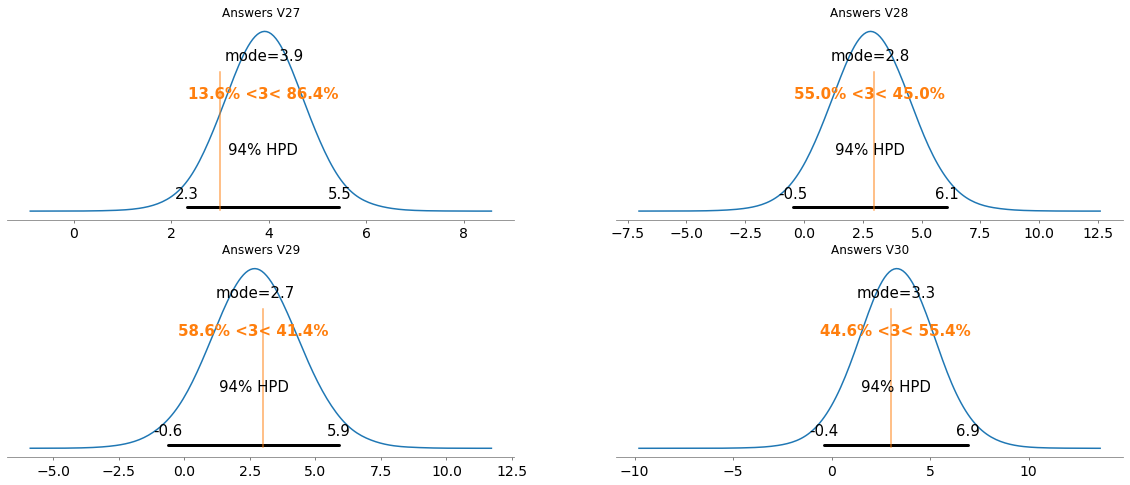

In [6]:
fig, axs = plt.subplots(2, 2,figsize=(20,8))
pm.plot_posterior(ppc_protective_linux_kernel['obs27'],ref_val=3,point_estimate='mode', ax=axs[0,0])
pm.plot_posterior(ppc_protective_linux_kernel['obs28'],ref_val=3,point_estimate='mode', ax=axs[0,1])
pm.plot_posterior(ppc_protective_linux_kernel['obs29'],ref_val=3,point_estimate='mode', ax=axs[1,0])
pm.plot_posterior(ppc_protective_linux_kernel['obs30'],ref_val=3,point_estimate='mode', ax=axs[1,1])
axs[0, 0].set_title('Answers V27')
axs[0, 1].set_title('Answers V28')
axs[1, 0].set_title('Answers V29')
axs[1, 1].set_title('Answers V30')
plt.show()

#### Queries

##### Protective

We define a function that precisely defines whether the answers to a question are _positive_ based on its probability distribution. 

Note that for each question we consider the distribution of the answer as positive if the distribution has 95% of the asnwers below 3.0. Intuitively, it means that all the answers are concentrated in strong agree, agree or neutral. This is typically known in statistics as the Region of Practical Equivalence ([ROPE](https://cran.r-project.org/web/packages/bayestestR/vignettes/region_of_practical_equivalence.html)). In other words, our results assume an error of 5%. [NOTE: check the last statement]

In [7]:
def protective(trace):
    return (np.mean(trace['obs28'] < 3.0) > .95 or
            np.mean(trace['obs29'] < 3.0) > .95 or
            np.mean(trace['obs30'] < 3.0) > .95)

Now we ask whether the Linux Kernel community is protective.

In [8]:
print("Is the " + Community + " community protective? " + str(protective(ppc_protective_linux_kernel)))

Is the Comm.Linux_Kernel community protective? False


#### Conclusions

As the output of the cell above suggest, the Linux Kernel communitive is not protective. Therefore we can conclude that **hypothesis 1 is false**.

The HPD intervals show that the answers are heavily spread over all possibilities, i.e., all values from 1 to 5 are within the HPD interval. This observation indicates that the community does not show a central tendency in how protective they are.

### H2: The FOSSASIA community adopts an equitable style of governance for its pull request process

#### Data

Here we simply load the data we will analyze, i.e., answers to question V31 and V32 by the FOSSASIA community.

In [9]:
# Preview of the answers of the FOSSASIA community to answers V31 and V32
Community = 'Comm.FOSSASIA'
v31 = df[(df.Community == Community) & (df.V31 != -1)].V31
v32 = df[(df.Community == Community) & (df.V32 != -1)].V32

#### Model

To study this hypothesis, we estimate the distribution of the answers to questions V31 and V32 by participants of the FOSSASIA community. As mentioned earlier, we assume that the data form a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). We estimate the distribution for the answers to each question separately. We set [uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) priors on the parameters of the normal distributions—from $1$ to $5$ for the mean, and $0$ to $10$ for the standard deviation. Finally we check whether the answers are positive to any of the questions above. That is, whether the participants reply in the range neutral, agree or strongly agree.

In [10]:
with pm.Model() as equitable_fossasia:
  μ31 = pm.Uniform('μ31', lower=1, upper=5)
  μ32 = pm.Uniform('μ32', lower=1, upper=5)

  σ31 = pm.Uniform('σ31', lower=0, upper=4)
  σ32 = pm.Uniform('σ32', lower=0, upper=4)

  obs31 = pm.Normal('obs31',mu=μ31,sigma=σ31,observed=v31)
  obs32 = pm.Normal('obs32',mu=μ32,sigma=σ32,observed=v32)

#### Sampling

In [11]:
with equitable_fossasia:
  trace_equitable_fossasia = pm.sample(10000,cores=2)
  ppc_equitable_fosassia = pm.sample_posterior_predictive(trace_equitable_fossasia, 
                                                          samples=5000, 
                                                          model=equitable_fossasia)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [σ32, σ31, μ32, μ31]


Sampling 2 chains:   0%|          | 0/21000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 98/21000 [00:00<00:21, 969.92draws/s]

Sampling 2 chains:   1%|          | 227/21000 [00:00<00:19, 1047.50draws/s]

Sampling 2 chains:   2%|▏         | 362/21000 [00:00<00:18, 1122.41draws/s]

Sampling 2 chains:   2%|▏         | 455/21000 [00:00<00:19, 1055.78draws/s]

Sampling 2 chains:   3%|▎         | 548/21000 [00:00<00:20, 1012.16draws/s]

Sampling 2 chains:   3%|▎         | 671/21000 [00:00<00:19, 1065.45draws/s]

Sampling 2 chains:   4%|▍         | 797/21000 [00:00<00:18, 1116.31draws/s]

Sampling 2 chains:   4%|▍         | 912/21000 [00:00<00:17, 1124.88draws/s]

Sampling 2 chains:   5%|▍         | 1025/21000 [00:00<00:17, 1124.76draws/s]

Sampling 2 chains:   6%|▌         | 1155/21000 [00:01<00:16, 1171.10draws/s]

Sampling 2 chains:   6%|▌         | 1288/21000 [00:01<00:16, 1213.08draws/s]

Sampling 2 chains:   7%|▋         | 1433/21000 [00:01<00:15, 1271.52draws/s]

Sampling 2 chains:   7%|▋         | 1570/21000 [00:01<00:14, 1298.35draws/s]

Sampling 2 chains:   8%|▊         | 1713/21000 [00:01<00:14, 1333.51draws/s]

Sampling 2 chains:   9%|▉         | 1855/21000 [00:01<00:14, 1357.04draws/s]

Sampling 2 chains:   9%|▉         | 1992/21000 [00:01<00:14, 1343.28draws/s]

Sampling 2 chains:  10%|█         | 2127/21000 [00:01<00:14, 1338.98draws/s]

Sampling 2 chains:  11%|█         | 2262/21000 [00:01<00:14, 1312.11draws/s]

Sampling 2 chains:  11%|█▏        | 2394/21000 [00:01<00:14, 1255.15draws/s]

Sampling 2 chains:  12%|█▏        | 2521/21000 [00:02<00:14, 1243.64draws/s]

Sampling 2 chains:  13%|█▎        | 2646/21000 [00:02<00:15, 1214.26draws/s]

Sampling 2 chains:  13%|█▎        | 2777/21000 [00:02<00:14, 1240.66draws/s]

Sampling 2 chains:  14%|█▍        | 2902/21000 [00:02<00:15, 1178.03draws/s]

Sampling 2 chains:  14%|█▍        | 3021/21000 [00:02<00:15, 1178.53draws/s]

Sampling 2 chains:  15%|█▌        | 3161/21000 [00:02<00:14, 1236.75draws/s]

Sampling 2 chains:  16%|█▌        | 3287/21000 [00:02<00:14, 1240.11draws/s]

Sampling 2 chains:  16%|█▋        | 3419/21000 [00:02<00:13, 1260.39draws/s]

Sampling 2 chains:  17%|█▋        | 3546/21000 [00:02<00:13, 1255.45draws/s]

Sampling 2 chains:  17%|█▋        | 3673/21000 [00:02<00:13, 1249.56draws/s]

Sampling 2 chains:  18%|█▊        | 3805/21000 [00:03<00:13, 1268.82draws/s]

Sampling 2 chains:  19%|█▊        | 3934/21000 [00:03<00:13, 1273.40draws/s]

Sampling 2 chains:  19%|█▉        | 4062/21000 [00:03<00:13, 1213.84draws/s]

Sampling 2 chains:  20%|█▉        | 4199/21000 [00:03<00:13, 1254.81draws/s]

Sampling 2 chains:  21%|██        | 4326/21000 [00:03<00:14, 1184.54draws/s]

Sampling 2 chains:  21%|██        | 4458/21000 [00:03<00:13, 1221.46draws/s]

Sampling 2 chains:  22%|██▏       | 4582/21000 [00:03<00:14, 1167.35draws/s]

Sampling 2 chains:  22%|██▏       | 4708/21000 [00:03<00:13, 1192.57draws/s]

Sampling 2 chains:  23%|██▎       | 4842/21000 [00:03<00:13, 1231.27draws/s]

Sampling 2 chains:  24%|██▎       | 4967/21000 [00:04<00:13, 1224.09draws/s]

Sampling 2 chains:  24%|██▍       | 5093/21000 [00:04<00:12, 1230.86draws/s]

Sampling 2 chains:  25%|██▍       | 5217/21000 [00:04<00:12, 1218.07draws/s]

Sampling 2 chains:  25%|██▌       | 5345/21000 [00:04<00:12, 1233.76draws/s]

Sampling 2 chains:  26%|██▌       | 5469/21000 [00:04<00:13, 1163.74draws/s]

Sampling 2 chains:  27%|██▋       | 5597/21000 [00:04<00:12, 1195.31draws/s]

Sampling 2 chains:  27%|██▋       | 5718/21000 [00:04<00:13, 1124.79draws/s]

Sampling 2 chains:  28%|██▊       | 5841/21000 [00:04<00:13, 1154.12draws/s]

Sampling 2 chains:  28%|██▊       | 5968/21000 [00:04<00:12, 1186.25draws/s]

Sampling 2 chains:  29%|██▉       | 6088/21000 [00:04<00:12, 1165.44draws/s]

Sampling 2 chains:  30%|██▉       | 6220/21000 [00:05<00:12, 1206.09draws/s]

Sampling 2 chains:  30%|███       | 6360/21000 [00:05<00:11, 1258.00draws/s]

Sampling 2 chains:  31%|███       | 6488/21000 [00:05<00:12, 1174.08draws/s]

Sampling 2 chains:  31%|███▏      | 6608/21000 [00:05<00:12, 1136.66draws/s]

Sampling 2 chains:  32%|███▏      | 6724/21000 [00:05<00:12, 1141.95draws/s]

Sampling 2 chains:  33%|███▎      | 6840/21000 [00:05<00:13, 1051.69draws/s]

Sampling 2 chains:  33%|███▎      | 6948/21000 [00:05<00:13, 1023.53draws/s]

Sampling 2 chains:  34%|███▎      | 7085/21000 [00:05<00:12, 1106.33draws/s]

Sampling 2 chains:  34%|███▍      | 7222/21000 [00:05<00:11, 1172.69draws/s]

Sampling 2 chains:  35%|███▍      | 7347/21000 [00:06<00:11, 1194.29draws/s]

Sampling 2 chains:  36%|███▌      | 7470/21000 [00:06<00:11, 1202.05draws/s]

Sampling 2 chains:  36%|███▌      | 7592/21000 [00:06<00:11, 1206.81draws/s]

Sampling 2 chains:  37%|███▋      | 7714/21000 [00:06<00:11, 1196.42draws/s]

Sampling 2 chains:  37%|███▋      | 7835/21000 [00:06<00:10, 1199.83draws/s]

Sampling 2 chains:  38%|███▊      | 7956/21000 [00:06<00:11, 1185.47draws/s]

Sampling 2 chains:  38%|███▊      | 8076/21000 [00:06<00:10, 1180.54draws/s]

Sampling 2 chains:  39%|███▉      | 8195/21000 [00:06<00:11, 1130.64draws/s]

Sampling 2 chains:  40%|███▉      | 8314/21000 [00:06<00:11, 1147.15draws/s]

Sampling 2 chains:  40%|████      | 8448/21000 [00:07<00:10, 1193.87draws/s]

Sampling 2 chains:  41%|████      | 8569/21000 [00:07<00:10, 1176.57draws/s]

Sampling 2 chains:  41%|████▏     | 8689/21000 [00:07<00:10, 1182.38draws/s]

Sampling 2 chains:  42%|████▏     | 8808/21000 [00:07<00:10, 1113.04draws/s]

Sampling 2 chains:  42%|████▏     | 8921/21000 [00:07<00:10, 1107.76draws/s]

Sampling 2 chains:  43%|████▎     | 9052/21000 [00:07<00:10, 1160.77draws/s]

Sampling 2 chains:  44%|████▎     | 9177/21000 [00:07<00:09, 1185.69draws/s]

Sampling 2 chains:  44%|████▍     | 9297/21000 [00:07<00:10, 1116.05draws/s]

Sampling 2 chains:  45%|████▍     | 9411/21000 [00:07<00:11, 1026.27draws/s]

Sampling 2 chains:  45%|████▌     | 9517/21000 [00:07<00:11, 1033.48draws/s]

Sampling 2 chains:  46%|████▌     | 9623/21000 [00:08<00:10, 1034.93draws/s]

Sampling 2 chains:  46%|████▋     | 9743/21000 [00:08<00:10, 1076.65draws/s]

Sampling 2 chains:  47%|████▋     | 9856/21000 [00:08<00:10, 1090.90draws/s]

Sampling 2 chains:  47%|████▋     | 9967/21000 [00:08<00:10, 1094.16draws/s]

Sampling 2 chains:  48%|████▊     | 10078/21000 [00:08<00:10, 1088.84draws/s]

Sampling 2 chains:  49%|████▊     | 10188/21000 [00:08<00:09, 1089.52draws/s]

Sampling 2 chains:  49%|████▉     | 10298/21000 [00:08<00:10, 1014.88draws/s]

Sampling 2 chains:  50%|████▉     | 10401/21000 [00:08<00:10, 987.18draws/s] 

Sampling 2 chains:  50%|█████     | 10501/21000 [00:08<00:11, 910.21draws/s]

Sampling 2 chains:  50%|█████     | 10594/21000 [00:09<00:11, 877.99draws/s]

Sampling 2 chains:  51%|█████     | 10684/21000 [00:09<00:11, 864.56draws/s]

Sampling 2 chains:  51%|█████▏    | 10772/21000 [00:09<00:11, 859.72draws/s]

Sampling 2 chains:  52%|█████▏    | 10859/21000 [00:09<00:11, 856.22draws/s]

Sampling 2 chains:  52%|█████▏    | 10947/21000 [00:09<00:11, 857.52draws/s]

Sampling 2 chains:  53%|█████▎    | 11044/21000 [00:09<00:11, 887.28draws/s]

Sampling 2 chains:  53%|█████▎    | 11181/21000 [00:09<00:09, 990.58draws/s]

Sampling 2 chains:  54%|█████▍    | 11299/21000 [00:09<00:09, 1037.66draws/s]

Sampling 2 chains:  54%|█████▍    | 11407/21000 [00:09<00:09, 1038.00draws/s]

Sampling 2 chains:  55%|█████▍    | 11514/21000 [00:10<00:09, 1024.48draws/s]

Sampling 2 chains:  55%|█████▌    | 11647/21000 [00:10<00:08, 1097.87draws/s]

Sampling 2 chains:  56%|█████▌    | 11767/21000 [00:10<00:08, 1126.21draws/s]

Sampling 2 chains:  57%|█████▋    | 11884/21000 [00:10<00:08, 1138.06draws/s]

Sampling 2 chains:  57%|█████▋    | 12016/21000 [00:10<00:07, 1184.90draws/s]

Sampling 2 chains:  58%|█████▊    | 12146/21000 [00:10<00:07, 1215.22draws/s]

Sampling 2 chains:  58%|█████▊    | 12269/21000 [00:10<00:07, 1215.74draws/s]

Sampling 2 chains:  59%|█████▉    | 12392/21000 [00:10<00:07, 1210.66draws/s]

Sampling 2 chains:  60%|█████▉    | 12514/21000 [00:10<00:07, 1142.21draws/s]

Sampling 2 chains:  60%|██████    | 12637/21000 [00:10<00:07, 1164.93draws/s]

Sampling 2 chains:  61%|██████    | 12756/21000 [00:11<00:07, 1170.69draws/s]

Sampling 2 chains:  61%|██████▏   | 12874/21000 [00:11<00:07, 1058.16draws/s]

Sampling 2 chains:  62%|██████▏   | 12990/21000 [00:11<00:07, 1086.13draws/s]

Sampling 2 chains:  62%|██████▏   | 13107/21000 [00:11<00:07, 1109.98draws/s]

Sampling 2 chains:  63%|██████▎   | 13220/21000 [00:11<00:07, 1096.20draws/s]

Sampling 2 chains:  63%|██████▎   | 13334/21000 [00:11<00:06, 1106.75draws/s]

Sampling 2 chains:  64%|██████▍   | 13446/21000 [00:11<00:07, 1057.44draws/s]

Sampling 2 chains:  65%|██████▍   | 13553/21000 [00:11<00:07, 981.23draws/s] 

Sampling 2 chains:  65%|██████▌   | 13653/21000 [00:11<00:07, 932.22draws/s]

Sampling 2 chains:  65%|██████▌   | 13748/21000 [00:12<00:08, 889.32draws/s]

Sampling 2 chains:  66%|██████▌   | 13839/21000 [00:12<00:08, 867.08draws/s]

Sampling 2 chains:  66%|██████▋   | 13962/21000 [00:12<00:07, 950.21draws/s]

Sampling 2 chains:  67%|██████▋   | 14084/21000 [00:12<00:06, 1016.39draws/s]

Sampling 2 chains:  68%|██████▊   | 14201/21000 [00:12<00:06, 1054.39draws/s]

Sampling 2 chains:  68%|██████▊   | 14333/21000 [00:12<00:05, 1120.98draws/s]

Sampling 2 chains:  69%|██████▉   | 14451/21000 [00:12<00:05, 1137.82draws/s]

Sampling 2 chains:  69%|██████▉   | 14568/21000 [00:12<00:05, 1117.02draws/s]

Sampling 2 chains:  70%|██████▉   | 14687/21000 [00:12<00:05, 1135.62draws/s]

Sampling 2 chains:  71%|███████   | 14820/21000 [00:12<00:05, 1187.32draws/s]

Sampling 2 chains:  71%|███████   | 14941/21000 [00:13<00:05, 1151.11draws/s]

Sampling 2 chains:  72%|███████▏  | 15058/21000 [00:13<00:05, 1141.73draws/s]

Sampling 2 chains:  72%|███████▏  | 15174/21000 [00:13<00:05, 1099.52draws/s]

Sampling 2 chains:  73%|███████▎  | 15297/21000 [00:13<00:05, 1134.56draws/s]

Sampling 2 chains:  73%|███████▎  | 15412/21000 [00:13<00:05, 1090.01draws/s]

Sampling 2 chains:  74%|███████▍  | 15536/21000 [00:13<00:04, 1130.03draws/s]

Sampling 2 chains:  75%|███████▍  | 15651/21000 [00:13<00:04, 1134.51draws/s]

Sampling 2 chains:  75%|███████▌  | 15766/21000 [00:13<00:04, 1101.46draws/s]

Sampling 2 chains:  76%|███████▌  | 15886/21000 [00:13<00:04, 1129.18draws/s]

Sampling 2 chains:  76%|███████▌  | 16006/21000 [00:14<00:04, 1147.28draws/s]

Sampling 2 chains:  77%|███████▋  | 16136/21000 [00:14<00:04, 1187.40draws/s]

Sampling 2 chains:  77%|███████▋  | 16256/21000 [00:14<00:04, 1066.17draws/s]

Sampling 2 chains:  78%|███████▊  | 16376/21000 [00:14<00:04, 1102.80draws/s]

Sampling 2 chains:  79%|███████▊  | 16489/21000 [00:14<00:04, 1088.36draws/s]

Sampling 2 chains:  79%|███████▉  | 16601/21000 [00:14<00:04, 1092.20draws/s]

Sampling 2 chains:  80%|███████▉  | 16712/21000 [00:14<00:04, 990.82draws/s] 

Sampling 2 chains:  80%|████████  | 16814/21000 [00:14<00:04, 885.38draws/s]

Sampling 2 chains:  81%|████████  | 16907/21000 [00:14<00:04, 873.42draws/s]

Sampling 2 chains:  81%|████████  | 16998/21000 [00:15<00:04, 834.84draws/s]

Sampling 2 chains:  81%|████████▏ | 17084/21000 [00:15<00:04, 795.34draws/s]

Sampling 2 chains:  82%|████████▏ | 17174/21000 [00:15<00:04, 817.85draws/s]

Sampling 2 chains:  82%|████████▏ | 17258/21000 [00:15<00:04, 799.11draws/s]

Sampling 2 chains:  83%|████████▎ | 17344/21000 [00:15<00:04, 815.80draws/s]

Sampling 2 chains:  83%|████████▎ | 17476/21000 [00:15<00:03, 920.67draws/s]

Sampling 2 chains:  84%|████████▍ | 17588/21000 [00:15<00:03, 972.46draws/s]

Sampling 2 chains:  84%|████████▍ | 17690/21000 [00:15<00:03, 964.24draws/s]

Sampling 2 chains:  85%|████████▍ | 17790/21000 [00:15<00:03, 958.39draws/s]

Sampling 2 chains:  85%|████████▌ | 17899/21000 [00:16<00:03, 994.16draws/s]

Sampling 2 chains:  86%|████████▌ | 18017/21000 [00:16<00:02, 1036.57draws/s]

Sampling 2 chains:  86%|████████▋ | 18123/21000 [00:16<00:03, 867.70draws/s] 

Sampling 2 chains:  87%|████████▋ | 18216/21000 [00:16<00:03, 812.00draws/s]

Sampling 2 chains:  87%|████████▋ | 18303/21000 [00:16<00:03, 753.65draws/s]

Sampling 2 chains:  88%|████████▊ | 18383/21000 [00:16<00:03, 704.88draws/s]

Sampling 2 chains:  88%|████████▊ | 18458/21000 [00:16<00:03, 699.53draws/s]

Sampling 2 chains:  88%|████████▊ | 18531/21000 [00:16<00:03, 681.76draws/s]

Sampling 2 chains:  89%|████████▊ | 18604/21000 [00:17<00:03, 691.41draws/s]

Sampling 2 chains:  89%|████████▉ | 18677/21000 [00:17<00:03, 701.76draws/s]

Sampling 2 chains:  89%|████████▉ | 18749/21000 [00:17<00:03, 696.78draws/s]

Sampling 2 chains:  90%|████████▉ | 18820/21000 [00:17<00:03, 674.90draws/s]

Sampling 2 chains:  90%|████████▉ | 18889/21000 [00:17<00:03, 666.38draws/s]

Sampling 2 chains:  90%|█████████ | 18957/21000 [00:17<00:03, 662.04draws/s]

Sampling 2 chains:  91%|█████████ | 19025/21000 [00:17<00:02, 667.27draws/s]

Sampling 2 chains:  91%|█████████ | 19092/21000 [00:17<00:02, 645.88draws/s]

Sampling 2 chains:  91%|█████████ | 19157/21000 [00:17<00:02, 621.40draws/s]

Sampling 2 chains:  92%|█████████▏| 19220/21000 [00:18<00:03, 583.89draws/s]

Sampling 2 chains:  92%|█████████▏| 19280/21000 [00:18<00:03, 567.34draws/s]

Sampling 2 chains:  92%|█████████▏| 19338/21000 [00:18<00:02, 561.73draws/s]

Sampling 2 chains:  92%|█████████▏| 19399/21000 [00:18<00:02, 570.85draws/s]

Sampling 2 chains:  93%|█████████▎| 19460/21000 [00:18<00:02, 581.24draws/s]

Sampling 2 chains:  93%|█████████▎| 19520/21000 [00:18<00:02, 586.05draws/s]

Sampling 2 chains:  93%|█████████▎| 19579/21000 [00:18<00:02, 568.04draws/s]

Sampling 2 chains:  94%|█████████▎| 19637/21000 [00:18<00:02, 563.45draws/s]

Sampling 2 chains:  94%|█████████▍| 19705/21000 [00:18<00:02, 593.82draws/s]

Sampling 2 chains:  94%|█████████▍| 19765/21000 [00:18<00:02, 595.17draws/s]

Sampling 2 chains:  94%|█████████▍| 19825/21000 [00:19<00:02, 586.94draws/s]

Sampling 2 chains:  95%|█████████▍| 19885/21000 [00:19<00:01, 588.48draws/s]

Sampling 2 chains:  95%|█████████▍| 19945/21000 [00:19<00:01, 570.03draws/s]

Sampling 2 chains:  95%|█████████▌| 20016/21000 [00:19<00:01, 604.11draws/s]

Sampling 2 chains:  96%|█████████▌| 20078/21000 [00:19<00:01, 565.74draws/s]

Sampling 2 chains:  96%|█████████▌| 20136/21000 [00:19<00:01, 526.11draws/s]

Sampling 2 chains:  96%|█████████▌| 20190/21000 [00:19<00:01, 504.13draws/s]

Sampling 2 chains:  96%|█████████▋| 20242/21000 [00:19<00:01, 496.18draws/s]

Sampling 2 chains:  97%|█████████▋| 20293/21000 [00:19<00:01, 479.14draws/s]

Sampling 2 chains:  97%|█████████▋| 20349/21000 [00:20<00:01, 499.52draws/s]

Sampling 2 chains:  97%|█████████▋| 20400/21000 [00:20<00:01, 495.43draws/s]

Sampling 2 chains:  97%|█████████▋| 20451/21000 [00:20<00:01, 492.16draws/s]

Sampling 2 chains:  98%|█████████▊| 20501/21000 [00:20<00:01, 475.54draws/s]

Sampling 2 chains:  98%|█████████▊| 20553/21000 [00:20<00:00, 483.47draws/s]

Sampling 2 chains:  98%|█████████▊| 20602/21000 [00:20<00:00, 455.85draws/s]

Sampling 2 chains:  98%|█████████▊| 20649/21000 [00:20<00:00, 434.78draws/s]

Sampling 2 chains:  99%|█████████▊| 20694/21000 [00:20<00:00, 426.29draws/s]

Sampling 2 chains:  99%|█████████▉| 20744/21000 [00:20<00:00, 443.17draws/s]

Sampling 2 chains:  99%|█████████▉| 20792/21000 [00:21<00:00, 452.72draws/s]

Sampling 2 chains:  99%|█████████▉| 20838/21000 [00:21<00:00, 449.42draws/s]

Sampling 2 chains:  99%|█████████▉| 20887/21000 [00:21<00:00, 459.99draws/s]

Sampling 2 chains: 100%|█████████▉| 20951/21000 [00:21<00:00, 502.28draws/s]

Sampling 2 chains: 100%|██████████| 21000/21000 [00:21<00:00, 978.33draws/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 25/5000 [00:00<00:20, 248.49it/s]

  2%|▏         | 80/5000 [00:00<00:16, 296.71it/s]

  3%|▎         | 154/5000 [00:00<00:13, 361.60it/s]

  5%|▍         | 229/5000 [00:00<00:11, 427.89it/s]

  6%|▌         | 303/5000 [00:00<00:09, 489.76it/s]

  8%|▊         | 376/5000 [00:00<00:08, 541.91it/s]

  9%|▉         | 449/5000 [00:00<00:07, 586.47it/s]

 10%|█         | 514/5000 [00:00<00:07, 590.78it/s]

 12%|█▏        | 581/5000 [00:00<00:07, 610.95it/s]

 13%|█▎        | 650/5000 [00:01<00:06, 631.30it/s]

 14%|█▍        | 716/5000 [00:01<00:06, 627.00it/s]

 16%|█▌        | 781/5000 [00:01<00:07, 578.21it/s]

 17%|█▋        | 841/5000 [00:01<00:07, 544.92it/s]

 18%|█▊        | 898/5000 [00:01<00:07, 528.59it/s]

 19%|█▉        | 953/5000 [00:01<00:08, 500.08it/s]

 20%|██        | 1017/5000 [00:01<00:07, 534.63it/s]

 22%|██▏       | 1090/5000 [00:01<00:06, 580.98it/s]

 23%|██▎       | 1165/5000 [00:01<00:06, 621.63it/s]

 25%|██▍       | 1240/5000 [00:02<00:05, 653.66it/s]

 26%|██▌       | 1308/5000 [00:02<00:05, 659.92it/s]

 28%|██▊       | 1376/5000 [00:02<00:05, 634.76it/s]

 29%|██▉       | 1441/5000 [00:02<00:05, 639.24it/s]

 30%|███       | 1506/5000 [00:02<00:05, 621.58it/s]

 31%|███▏      | 1569/5000 [00:02<00:05, 618.75it/s]

 33%|███▎      | 1632/5000 [00:02<00:05, 580.17it/s]

 34%|███▍      | 1691/5000 [00:02<00:05, 563.63it/s]

 35%|███▍      | 1749/5000 [00:02<00:05, 551.28it/s]

 36%|███▌      | 1805/5000 [00:03<00:05, 549.02it/s]

 37%|███▋      | 1861/5000 [00:03<00:05, 547.24it/s]

 38%|███▊      | 1916/5000 [00:03<00:05, 548.01it/s]

 39%|███▉      | 1971/5000 [00:03<00:05, 537.21it/s]

 40%|████      | 2025/5000 [00:03<00:05, 536.70it/s]

 42%|████▏     | 2079/5000 [00:03<00:05, 534.83it/s]

 43%|████▎     | 2133/5000 [00:03<00:05, 535.73it/s]

 44%|████▍     | 2188/5000 [00:03<00:05, 537.18it/s]

 45%|████▌     | 2267/5000 [00:03<00:04, 593.50it/s]

 47%|████▋     | 2344/5000 [00:03<00:04, 637.23it/s]

 48%|████▊     | 2420/5000 [00:04<00:03, 669.09it/s]

 50%|████▉     | 2496/5000 [00:04<00:03, 693.89it/s]

 51%|█████▏    | 2572/5000 [00:04<00:03, 711.95it/s]

 53%|█████▎    | 2647/5000 [00:04<00:03, 721.60it/s]

 54%|█████▍    | 2723/5000 [00:04<00:03, 731.80it/s]

 56%|█████▌    | 2800/5000 [00:04<00:02, 740.17it/s]

 58%|█████▊    | 2877/5000 [00:04<00:02, 747.54it/s]

 59%|█████▉    | 2953/5000 [00:04<00:02, 746.99it/s]

 61%|██████    | 3030/5000 [00:04<00:02, 751.60it/s]

 62%|██████▏   | 3106/5000 [00:04<00:02, 728.24it/s]

 64%|██████▎   | 3180/5000 [00:05<00:02, 712.67it/s]

 65%|██████▌   | 3258/5000 [00:05<00:02, 730.02it/s]

 67%|██████▋   | 3332/5000 [00:05<00:02, 732.61it/s]

 68%|██████▊   | 3407/5000 [00:05<00:02, 735.47it/s]

 70%|██████▉   | 3482/5000 [00:05<00:02, 738.09it/s]

 71%|███████   | 3557/5000 [00:05<00:01, 741.46it/s]

 73%|███████▎  | 3632/5000 [00:05<00:01, 740.76it/s]

 74%|███████▍  | 3707/5000 [00:05<00:01, 738.71it/s]

 76%|███████▌  | 3782/5000 [00:05<00:01, 740.83it/s]

 77%|███████▋  | 3857/5000 [00:05<00:01, 742.33it/s]

 79%|███████▊  | 3933/5000 [00:06<00:01, 744.57it/s]

 80%|████████  | 4008/5000 [00:06<00:01, 745.03it/s]

 82%|████████▏ | 4083/5000 [00:06<00:01, 741.86it/s]

 83%|████████▎ | 4158/5000 [00:06<00:01, 743.23it/s]

 85%|████████▍ | 4233/5000 [00:06<00:01, 743.43it/s]

 86%|████████▌ | 4308/5000 [00:06<00:00, 742.17it/s]

 88%|████████▊ | 4385/5000 [00:06<00:00, 749.85it/s]

 89%|████████▉ | 4461/5000 [00:06<00:00, 749.69it/s]

 91%|█████████ | 4538/5000 [00:06<00:00, 753.31it/s]

 92%|█████████▏| 4615/5000 [00:06<00:00, 757.64it/s]

 94%|█████████▍| 4693/5000 [00:07<00:00, 761.31it/s]

 95%|█████████▌| 4770/5000 [00:07<00:00, 762.68it/s]

 97%|█████████▋| 4847/5000 [00:07<00:00, 760.79it/s]

 98%|█████████▊| 4924/5000 [00:07<00:00, 762.03it/s]

100%|██████████| 5000/5000 [00:07<00:00, 669.73it/s]

#### Plotting

We show the different distributions for the data. The plots show the percentage of probability density above and below 3, i.e., the percentage of answers above (towards strong disagree) or below (towards strong agree) neutral.

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:123: SyntaxWarning: More chains (5000) than draws (29). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,


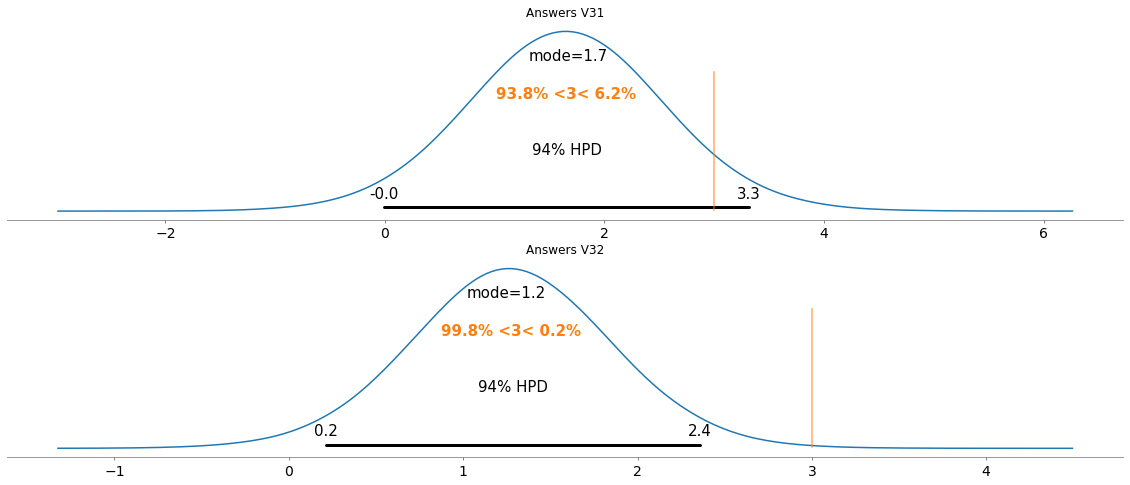

In [12]:

fig, (ax1,ax2) = plt.subplots(2, figsize=(20,8))
pm.plot_posterior(ppc_equitable_fosassia['obs31'],ref_val=3,point_estimate='mode',ax=ax1)
pm.plot_posterior(ppc_equitable_fosassia['obs32'],ref_val=3,point_estimate='mode',ax=ax2)
ax1.set_title('Answers V31')
ax2.set_title('Answers V32')
plt.show()

#### Queries

##### Equitable

Here we define a function that determines whether the answers of a community are _equitable_.
To do so, the function checks whether the community is _positive_ to question V31 and V32.
We precisely defined begin positive as replying with answers in the range neutral, agree or strongly agree (see [Answers](#Answers))

Note that, in the function below, for each question we consider the distribution of the answer as positive if the distribution has 95% of the asnwers below 3.0. Intuitively, it means that all the answers are concentrated in strong agree, agree or neutral. This is typically known in statistics as the Region of Practical Equivalence ([ROPE](https://cran.r-project.org/web/packages/bayestestR/vignettes/region_of_practical_equivalence.html)). In other words, our results assume an error of 5%. [NOTE: check the last statement]

In [13]:
def equitable(trace):
    return (np.mean(trace['obs31'] < 3.0) > .95 or
            np.mean(trace['obs32'] < 3.0) > .95)

Now we ask whether the FOSSASIA community is equitable

In [14]:
print("Is the " + Community + " community equitable? " + str(equitable(ppc_equitable_fosassia)))

Is the Comm.FOSSASIA community equitable? True


#### Conclusion

As stated in the previous cell, the results indicate that the FOSSASIA
community displays an equitable behaviour. Therefore, **hypothesis H2
is true**.

By looking a the graphs in the plotting section, we can see that the
hypothesis is true due to the answers to question V32. This
distribution has mode 1.3 and the HDP interval goes from 0.2 to 2.3,
meaning that most participants answer strongly agree or
agree. Nevertheless, the answers to question V31 are closer to
neutral. The HDP interval goes from 0 to 3.3, also 6.3% of the
distribution is in the range of answers neutral/disagree. This might
suggest that there are some participants who responded  "disagree"
to this question.

### H4: The DuckDuckGo community adopts a lenient style of governance for its pull request process


#### Data

Here we simply print the data we will analyze, i.e., answers to question V33 by the Coala community.

In [15]:
## Just showing that all answer to V33 by duckduck go are -1
df[(df.Community == 'Comm.DuckDuckGo')].V33

125   -1
128   -1
129   -1
329   -1
Name: V33, dtype: int64

#### Conclusions

Since nobody from the DuckDuckGo community reply to answer V33 we cannot perform the analysis.

### H5: The Coala community adopts a linient style of governance for its pull request process


#### Data

Here we simply load the data we will analyze, i.e., answers to question V33 by the Coala community.

In [16]:
v33_Coala = df[(df.Community == 'Comm.Coala') & (df.V33 != -1)].V33

#### Model

To study this hypothesis, we estimate the distribution of the answers
to question V33 by participants of the Coala community. As mentioned earlier, we assume that the data form a [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution). We
set
[uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
priors on the parameters of the normal distributions for the data—from
$1$ to $5$ for the mean, and $0$ to $10$ for the standard
deviation. Finally we look into the posterior distribution to determine whether the hypothesis is validated by the data.


In [17]:
with pm.Model() as coala_lenient:
    μ = pm.Uniform('μ', 1, 5)
    σ = pm.Uniform('σ', 0, 10)

    obs = pm.Normal('obs', mu=μ, sigma=σ,
                    observed=v33_Coala)

#### Sampling

In [18]:
with coala_lenient:
  trace_coala_lenient = pm.sample(10000,cores=2) # Compute posterior
  ppc_coala_lenient = pm.sample_posterior_predictive(trace_coala_lenient,
                                                     samples=5000,
                                                     model=coala_lenient) # Computer predictive check

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [σ, μ]


Sampling 2 chains:   0%|          | 0/21000 [00:00<?, ?draws/s]

Sampling 2 chains:   1%|          | 143/21000 [00:00<00:14, 1419.11draws/s]

Sampling 2 chains:   2%|▏         | 316/21000 [00:00<00:13, 1498.76draws/s]

Sampling 2 chains:   2%|▏         | 515/21000 [00:00<00:12, 1618.12draws/s]

Sampling 2 chains:   3%|▎         | 702/21000 [00:00<00:12, 1683.13draws/s]

Sampling 2 chains:   4%|▍         | 892/21000 [00:00<00:11, 1741.58draws/s]

Sampling 2 chains:   5%|▌         | 1087/21000 [00:00<00:11, 1797.01draws/s]

Sampling 2 chains:   6%|▌         | 1253/21000 [00:00<00:11, 1709.43draws/s]

Sampling 2 chains:   7%|▋         | 1457/21000 [00:00<00:10, 1796.46draws/s]

Sampling 2 chains:   8%|▊         | 1649/21000 [00:00<00:10, 1831.11draws/s]

Sampling 2 chains:   9%|▉         | 1851/21000 [00:01<00:10, 1883.93draws/s]

Sampling 2 chains:  10%|▉         | 2038/21000 [00:01<00:10, 1848.59draws/s]

Sampling 2 chains:  11%|█         | 2243/21000 [00:01<00:09, 1904.22draws/s]

Sampling 2 chains:  12%|█▏        | 2454/21000 [00:01<00:09, 1959.17draws/s]

Sampling 2 chains:  13%|█▎        | 2674/21000 [00:01<00:09, 2022.40draws/s]

Sampling 2 chains:  14%|█▎        | 2877/21000 [00:01<00:09, 1831.52draws/s]

Sampling 2 chains:  15%|█▍        | 3064/21000 [00:01<00:09, 1823.34draws/s]

Sampling 2 chains:  16%|█▌        | 3298/21000 [00:01<00:09, 1952.38draws/s]

Sampling 2 chains:  17%|█▋        | 3504/21000 [00:01<00:08, 1983.22draws/s]

Sampling 2 chains:  18%|█▊        | 3712/21000 [00:01<00:08, 2009.70draws/s]

Sampling 2 chains:  19%|█▊        | 3931/21000 [00:02<00:08, 2059.89draws/s]

Sampling 2 chains:  20%|█▉        | 4139/21000 [00:02<00:08, 1951.36draws/s]

Sampling 2 chains:  21%|██        | 4337/21000 [00:02<00:08, 1947.75draws/s]

Sampling 2 chains:  22%|██▏       | 4534/21000 [00:02<00:09, 1810.40draws/s]

Sampling 2 chains:  22%|██▏       | 4722/21000 [00:02<00:08, 1829.96draws/s]

Sampling 2 chains:  23%|██▎       | 4917/21000 [00:02<00:08, 1862.42draws/s]

Sampling 2 chains:  24%|██▍       | 5105/21000 [00:02<00:08, 1785.70draws/s]

Sampling 2 chains:  25%|██▌       | 5286/21000 [00:02<00:09, 1726.50draws/s]

Sampling 2 chains:  26%|██▌       | 5461/21000 [00:02<00:09, 1664.26draws/s]

Sampling 2 chains:  27%|██▋       | 5655/21000 [00:03<00:08, 1737.38draws/s]

Sampling 2 chains:  28%|██▊       | 5851/21000 [00:03<00:08, 1797.67draws/s]

Sampling 2 chains:  29%|██▊       | 6033/21000 [00:03<00:08, 1801.78draws/s]

Sampling 2 chains:  30%|██▉       | 6215/21000 [00:03<00:08, 1758.63draws/s]

Sampling 2 chains:  31%|███       | 6422/21000 [00:03<00:07, 1840.75draws/s]

Sampling 2 chains:  31%|███▏      | 6608/21000 [00:03<00:07, 1833.83draws/s]

Sampling 2 chains:  32%|███▏      | 6793/21000 [00:03<00:07, 1819.97draws/s]

Sampling 2 chains:  33%|███▎      | 6979/21000 [00:03<00:07, 1831.14draws/s]

Sampling 2 chains:  34%|███▍      | 7163/21000 [00:03<00:07, 1831.61draws/s]

Sampling 2 chains:  35%|███▍      | 7347/21000 [00:03<00:07, 1787.40draws/s]

Sampling 2 chains:  36%|███▌      | 7544/21000 [00:04<00:07, 1836.85draws/s]

Sampling 2 chains:  37%|███▋      | 7729/21000 [00:04<00:07, 1753.23draws/s]

Sampling 2 chains:  38%|███▊      | 7906/21000 [00:04<00:07, 1671.22draws/s]

Sampling 2 chains:  38%|███▊      | 8075/21000 [00:04<00:08, 1613.00draws/s]

Sampling 2 chains:  39%|███▉      | 8238/21000 [00:04<00:08, 1571.80draws/s]

Sampling 2 chains:  40%|████      | 8404/21000 [00:04<00:07, 1594.28draws/s]

Sampling 2 chains:  41%|████      | 8565/21000 [00:04<00:08, 1552.91draws/s]

Sampling 2 chains:  42%|████▏     | 8732/21000 [00:04<00:07, 1584.86draws/s]

Sampling 2 chains:  42%|████▏     | 8901/21000 [00:04<00:07, 1614.46draws/s]

Sampling 2 chains:  43%|████▎     | 9066/21000 [00:05<00:07, 1623.79draws/s]

Sampling 2 chains:  44%|████▍     | 9259/21000 [00:05<00:06, 1704.28draws/s]

Sampling 2 chains:  45%|████▌     | 9464/21000 [00:05<00:06, 1793.92draws/s]

Sampling 2 chains:  46%|████▌     | 9692/21000 [00:05<00:05, 1914.12draws/s]

Sampling 2 chains:  47%|████▋     | 9904/21000 [00:05<00:05, 1970.79draws/s]

Sampling 2 chains:  48%|████▊     | 10105/21000 [00:05<00:05, 1958.38draws/s]

Sampling 2 chains:  49%|████▉     | 10304/21000 [00:05<00:05, 1935.96draws/s]

Sampling 2 chains:  50%|█████     | 10500/21000 [00:05<00:05, 1888.18draws/s]

Sampling 2 chains:  51%|█████     | 10691/21000 [00:05<00:05, 1870.41draws/s]

Sampling 2 chains:  52%|█████▏    | 10880/21000 [00:05<00:05, 1858.51draws/s]

Sampling 2 chains:  53%|█████▎    | 11073/21000 [00:06<00:05, 1879.24draws/s]

Sampling 2 chains:  54%|█████▎    | 11273/21000 [00:06<00:05, 1909.86draws/s]

Sampling 2 chains:  55%|█████▍    | 11467/21000 [00:06<00:04, 1918.63draws/s]

Sampling 2 chains:  56%|█████▌    | 11660/21000 [00:06<00:04, 1890.75draws/s]

Sampling 2 chains:  56%|█████▋    | 11850/21000 [00:06<00:04, 1858.19draws/s]

Sampling 2 chains:  57%|█████▋    | 12039/21000 [00:06<00:04, 1866.53draws/s]

Sampling 2 chains:  58%|█████▊    | 12244/21000 [00:06<00:04, 1911.56draws/s]

Sampling 2 chains:  59%|█████▉    | 12459/21000 [00:06<00:04, 1974.11draws/s]

Sampling 2 chains:  60%|██████    | 12658/21000 [00:06<00:04, 1918.29draws/s]

Sampling 2 chains:  61%|██████    | 12851/21000 [00:07<00:04, 1882.92draws/s]

Sampling 2 chains:  62%|██████▏   | 13042/21000 [00:07<00:04, 1889.37draws/s]

Sampling 2 chains:  63%|██████▎   | 13232/21000 [00:07<00:04, 1796.31draws/s]

Sampling 2 chains:  64%|██████▍   | 13438/21000 [00:07<00:04, 1866.79draws/s]

Sampling 2 chains:  65%|██████▍   | 13629/21000 [00:07<00:03, 1875.17draws/s]

Sampling 2 chains:  66%|██████▌   | 13818/21000 [00:07<00:03, 1862.08draws/s]

Sampling 2 chains:  67%|██████▋   | 14013/21000 [00:07<00:03, 1883.86draws/s]

Sampling 2 chains:  68%|██████▊   | 14203/21000 [00:07<00:03, 1853.00draws/s]

Sampling 2 chains:  69%|██████▊   | 14400/21000 [00:07<00:03, 1884.76draws/s]

Sampling 2 chains:  69%|██████▉   | 14590/21000 [00:07<00:03, 1885.16draws/s]

Sampling 2 chains:  70%|███████   | 14783/21000 [00:08<00:03, 1897.20draws/s]

Sampling 2 chains:  71%|███████▏  | 14977/21000 [00:08<00:03, 1909.30draws/s]

Sampling 2 chains:  72%|███████▏  | 15169/21000 [00:08<00:03, 1813.35draws/s]

Sampling 2 chains:  73%|███████▎  | 15365/21000 [00:08<00:03, 1850.21draws/s]

Sampling 2 chains:  74%|███████▍  | 15560/21000 [00:08<00:02, 1875.44draws/s]

Sampling 2 chains:  75%|███████▌  | 15761/21000 [00:08<00:02, 1911.48draws/s]

Sampling 2 chains:  76%|███████▌  | 15953/21000 [00:08<00:02, 1906.82draws/s]

Sampling 2 chains:  77%|███████▋  | 16145/21000 [00:08<00:02, 1900.06draws/s]

Sampling 2 chains:  78%|███████▊  | 16336/21000 [00:08<00:02, 1852.35draws/s]

Sampling 2 chains:  79%|███████▊  | 16522/21000 [00:08<00:02, 1829.36draws/s]

Sampling 2 chains:  80%|███████▉  | 16706/21000 [00:09<00:02, 1764.27draws/s]

Sampling 2 chains:  80%|████████  | 16884/21000 [00:09<00:02, 1692.75draws/s]

Sampling 2 chains:  81%|████████▏ | 17096/21000 [00:09<00:02, 1801.58draws/s]

Sampling 2 chains:  82%|████████▏ | 17282/21000 [00:09<00:02, 1816.77draws/s]

Sampling 2 chains:  83%|████████▎ | 17466/21000 [00:09<00:01, 1787.71draws/s]

Sampling 2 chains:  84%|████████▍ | 17665/21000 [00:09<00:01, 1843.63draws/s]

Sampling 2 chains:  85%|████████▌ | 17882/21000 [00:09<00:01, 1929.00draws/s]

Sampling 2 chains:  86%|████████▌ | 18091/21000 [00:09<00:01, 1973.46draws/s]

Sampling 2 chains:  87%|████████▋ | 18304/21000 [00:09<00:01, 2016.73draws/s]

Sampling 2 chains:  88%|████████▊ | 18516/21000 [00:10<00:01, 2044.96draws/s]

Sampling 2 chains:  89%|████████▉ | 18735/21000 [00:10<00:01, 2084.94draws/s]

Sampling 2 chains:  90%|█████████ | 18945/21000 [00:10<00:00, 2069.59draws/s]

Sampling 2 chains:  91%|█████████ | 19153/21000 [00:10<00:00, 2057.58draws/s]

Sampling 2 chains:  92%|█████████▏| 19360/21000 [00:10<00:00, 2029.77draws/s]

Sampling 2 chains:  93%|█████████▎| 19579/21000 [00:10<00:00, 2073.47draws/s]

Sampling 2 chains:  94%|█████████▍| 19795/21000 [00:10<00:00, 2098.01draws/s]

Sampling 2 chains:  95%|█████████▌| 20006/21000 [00:10<00:00, 2061.44draws/s]

Sampling 2 chains:  96%|█████████▋| 20213/21000 [00:10<00:00, 1930.81draws/s]

Sampling 2 chains:  97%|█████████▋| 20421/21000 [00:10<00:00, 1972.26draws/s]

Sampling 2 chains:  98%|█████████▊| 20628/21000 [00:11<00:00, 1999.78draws/s]

Sampling 2 chains:  99%|█████████▉| 20830/21000 [00:11<00:00, 1900.74draws/s]

Sampling 2 chains: 100%|██████████| 21000/21000 [00:11<00:00, 1855.33draws/s]

There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


The acceptance probability does not match the target. It is 0.6600473299645297, but should be close to 0.8. Try to increase the number of tuning steps.


  0%|          | 0/5000 [00:00<?, ?it/s]

  2%|▏         | 114/5000 [00:00<00:04, 1138.86it/s]

  5%|▌         | 261/5000 [00:00<00:03, 1219.99it/s]

  8%|▊         | 414/5000 [00:00<00:03, 1298.18it/s]

 11%|█▏        | 563/5000 [00:00<00:03, 1348.73it/s]

 14%|█▍        | 708/5000 [00:00<00:03, 1376.04it/s]

 17%|█▋        | 855/5000 [00:00<00:02, 1401.48it/s]

 20%|██        | 1001/5000 [00:00<00:02, 1417.44it/s]

 23%|██▎       | 1150/5000 [00:00<00:02, 1437.85it/s]

 26%|██▌       | 1288/5000 [00:00<00:02, 1417.40it/s]

 29%|██▊       | 1426/5000 [00:01<00:02, 1403.34it/s]

 32%|███▏      | 1579/5000 [00:01<00:02, 1436.80it/s]

 34%|███▍      | 1721/5000 [00:01<00:02, 1383.46it/s]

 37%|███▋      | 1859/5000 [00:01<00:02, 1357.56it/s]

 40%|███▉      | 1995/5000 [00:01<00:02, 1336.44it/s]

 43%|████▎     | 2129/5000 [00:01<00:02, 1325.30it/s]

 45%|████▌     | 2262/5000 [00:01<00:02, 1313.38it/s]

 48%|████▊     | 2394/5000 [00:01<00:01, 1314.27it/s]

 51%|█████     | 2526/5000 [00:01<00:01, 1307.16it/s]

 53%|█████▎    | 2658/5000 [00:01<00:01, 1309.89it/s]

 56%|█████▌    | 2790/5000 [00:02<00:01, 1312.49it/s]

 58%|█████▊    | 2922/5000 [00:02<00:01, 1301.14it/s]

 61%|██████▏   | 3065/5000 [00:02<00:01, 1335.55it/s]

 64%|██████▍   | 3220/5000 [00:02<00:01, 1392.07it/s]

 67%|██████▋   | 3369/5000 [00:02<00:01, 1417.08it/s]

 70%|███████   | 3519/5000 [00:02<00:01, 1440.89it/s]

 73%|███████▎  | 3664/5000 [00:02<00:00, 1440.36it/s]

 76%|███████▋  | 3813/5000 [00:02<00:00, 1453.17it/s]

 79%|███████▉  | 3964/5000 [00:02<00:00, 1469.04it/s]

 82%|████████▏ | 4112/5000 [00:02<00:00, 1463.77it/s]

 85%|████████▌ | 4259/5000 [00:03<00:00, 1462.52it/s]

 88%|████████▊ | 4410/5000 [00:03<00:00, 1474.14it/s]

 91%|█████████ | 4558/5000 [00:03<00:00, 1467.71it/s]

 94%|█████████▍| 4706/5000 [00:03<00:00, 1470.75it/s]

 97%|█████████▋| 4854/5000 [00:03<00:00, 1268.21it/s]

100%|██████████| 5000/5000 [00:03<00:00, 1390.39it/s]

#### Plotting

We show the distribution for the data. The plot shows the percentage of probability density above and below 3, i.e., the percentage of answers above (towards strong disagree) or below (towards strong agree) neutral.

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:123: SyntaxWarning: More chains (5000) than draws (7). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,


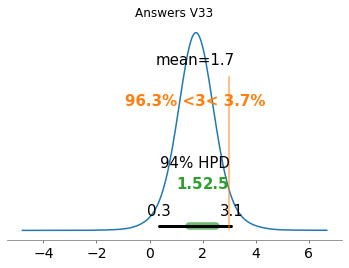

In [19]:

fig, ax = plt.subplots()
pm.plot_posterior(ppc_coala_lenient['obs'], ref_val=3, rope=(1.5,2.5), ax=ax)
ax.set_title('Answers V33')
plt.show()

#### Conclusions

The HDP of the distribution is from 0.4 to 3.1, i.e., most answers go from strongly agree to neutral. Only 3.9% of the answers are greater than 3, i.e., only 3.9% of the answer are on the side of disagree of strongly disagree. Therefore we can conclude that **hypothesis H5 is true**.

### H7 (BONUS): The Coala Community is more lenient than the Linux Kernel Community

#### Data

Here we simply load the data we will analyze, i.e., answers to
question V33 by the Coala and Linux Kernel community.

In [20]:
v33_Coala = df[(df.Community == 'Comm.Coala') & (df.V33 != -1)].V33
v33_Linux_Kernel = df[(df.Community == 'Comm.Linux_Kernel') & (df.V33 != -1)].V33

#### Model

To study this hypothesis, we estimate the distributions of the answers
to question V33 by the Coala and Linux Kernel communities.
As mentioned earlier, we assume that the data form a [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution). We
set
[uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
priors on the parameters of the normal distributions for the data—from
$1$ to $5$ for the mean, and $0$ to $10$ for the standard
deviation.

In order to compare the answers, we additionally compute the different
between the mean and standard deviation of the two estimated
distributions. Moreover, we compute the effective size between the two
differences. The effective size is a standard method to compared to
compare two estimated normal distributions (see puppies Chapter 16).


In [21]:
with pm.Model() as lenient_coala_vs_linuxkernel:
    μ_Coala = pm.Uniform('μ_Coala', 1, 5)
    σ_Coala = pm.Uniform('σ_Coala', 0, 10)

    obs_Coala = pm.Normal('obs_Coala', mu=μ_Coala, sigma=σ_Coala, observed=v33_Coala)

    μ_Linux_Kernel = pm.Uniform('μ_Linux_Kernel', 1, 5)
    σ_Linux_Kernel = pm.Uniform('σ_Linux_Kernel', 0, 10)

    obs_Linux_Kernel = pm.Normal('obs_Linux_Kernel', mu=μ_Linux_Kernel, sigma=σ_Linux_Kernel, observed=v33_Linux_Kernel)

    μ_diff = pm.Deterministic('μ_diff',μ_Coala-μ_Linux_Kernel)
    σ_diff = pm.Deterministic('σ_diff',σ_Coala-σ_Linux_Kernel)
    # See Chapter 16 of the puppies for definition of effect size
    eff_size = pm.Deterministic('eff_size', (μ_Coala-μ_Linux_Kernel)/pm.math.sqrt((pm.math.sqr(σ_Coala)+pm.math.sqr(σ_Linux_Kernel))/2))

#### Sampling

In [22]:
with lenient_coala_vs_linuxkernel:
  trace_lenient_coala_vs_linuxkernel = pm.sample(10000,cores=2) # Compute posterior
  ppc_lenient_coala_vs_linuxkernel = pm.sample_posterior_predictive(trace_lenient_coala_vs_linuxkernel,
                                                                    samples=5000,
                                                                    model=lenient_coala_vs_linuxkernel) # Computer predictive check

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [σ_Linux_Kernel, μ_Linux_Kernel, σ_Coala, μ_Coala]


Sampling 2 chains:   0%|          | 0/21000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 89/21000 [00:00<00:23, 887.12draws/s]

Sampling 2 chains:   1%|          | 193/21000 [00:00<00:22, 927.11draws/s]

Sampling 2 chains:   1%|▏         | 299/21000 [00:00<00:21, 960.14draws/s]

Sampling 2 chains:   2%|▏         | 392/21000 [00:00<00:21, 948.16draws/s]

Sampling 2 chains:   2%|▏         | 478/21000 [00:00<00:22, 919.10draws/s]

Sampling 2 chains:   3%|▎         | 585/21000 [00:00<00:21, 959.34draws/s]

Sampling 2 chains:   3%|▎         | 728/21000 [00:00<00:19, 1063.15draws/s]

Sampling 2 chains:   4%|▍         | 871/21000 [00:00<00:17, 1150.48draws/s]

Sampling 2 chains:   5%|▍         | 986/21000 [00:00<00:17, 1133.67draws/s]

Sampling 2 chains:   5%|▌         | 1123/21000 [00:01<00:16, 1192.89draws/s]

Sampling 2 chains:   6%|▌         | 1252/21000 [00:01<00:16, 1218.23draws/s]

Sampling 2 chains:   7%|▋         | 1391/21000 [00:01<00:15, 1261.98draws/s]

Sampling 2 chains:   7%|▋         | 1531/21000 [00:01<00:14, 1299.86draws/s]

Sampling 2 chains:   8%|▊         | 1666/21000 [00:01<00:14, 1311.59draws/s]

Sampling 2 chains:   9%|▊         | 1798/21000 [00:01<00:15, 1267.18draws/s]

Sampling 2 chains:   9%|▉         | 1926/21000 [00:01<00:15, 1229.84draws/s]

Sampling 2 chains:  10%|▉         | 2050/21000 [00:01<00:15, 1217.76draws/s]

Sampling 2 chains:  10%|█         | 2173/21000 [00:01<00:15, 1216.77draws/s]

Sampling 2 chains:  11%|█         | 2296/21000 [00:01<00:15, 1176.93draws/s]

Sampling 2 chains:  12%|█▏        | 2425/21000 [00:02<00:15, 1208.52draws/s]

Sampling 2 chains:  12%|█▏        | 2553/21000 [00:02<00:15, 1228.34draws/s]

Sampling 2 chains:  13%|█▎        | 2677/21000 [00:02<00:16, 1138.62draws/s]

Sampling 2 chains:  13%|█▎        | 2793/21000 [00:02<00:16, 1105.03draws/s]

Sampling 2 chains:  14%|█▍        | 2905/21000 [00:02<00:16, 1089.40draws/s]

Sampling 2 chains:  14%|█▍        | 3024/21000 [00:02<00:16, 1117.32draws/s]

Sampling 2 chains:  15%|█▍        | 3144/21000 [00:02<00:15, 1139.73draws/s]

Sampling 2 chains:  16%|█▌        | 3262/21000 [00:02<00:15, 1148.55draws/s]

Sampling 2 chains:  16%|█▌        | 3382/21000 [00:02<00:15, 1162.99draws/s]

Sampling 2 chains:  17%|█▋        | 3499/21000 [00:03<00:15, 1153.68draws/s]

Sampling 2 chains:  17%|█▋        | 3615/21000 [00:03<00:15, 1130.69draws/s]

Sampling 2 chains:  18%|█▊        | 3736/21000 [00:03<00:14, 1152.26draws/s]

Sampling 2 chains:  18%|█▊        | 3867/21000 [00:03<00:14, 1194.97draws/s]

Sampling 2 chains:  19%|█▉        | 3988/21000 [00:03<00:14, 1198.14draws/s]

Sampling 2 chains:  20%|█▉        | 4109/21000 [00:03<00:14, 1191.12draws/s]

Sampling 2 chains:  20%|██        | 4229/21000 [00:03<00:15, 1099.14draws/s]

Sampling 2 chains:  21%|██        | 4341/21000 [00:03<00:15, 1099.08draws/s]

Sampling 2 chains:  21%|██        | 4453/21000 [00:03<00:15, 1081.56draws/s]

Sampling 2 chains:  22%|██▏       | 4586/21000 [00:03<00:14, 1142.09draws/s]

Sampling 2 chains:  22%|██▏       | 4713/21000 [00:04<00:13, 1176.51draws/s]

Sampling 2 chains:  23%|██▎       | 4832/21000 [00:04<00:13, 1160.52draws/s]

Sampling 2 chains:  24%|██▎       | 4952/21000 [00:04<00:13, 1170.84draws/s]

Sampling 2 chains:  24%|██▍       | 5070/21000 [00:04<00:13, 1168.86draws/s]

Sampling 2 chains:  25%|██▍       | 5194/21000 [00:04<00:13, 1187.78draws/s]

Sampling 2 chains:  25%|██▌       | 5314/21000 [00:04<00:13, 1180.37draws/s]

Sampling 2 chains:  26%|██▌       | 5439/21000 [00:04<00:12, 1197.12draws/s]

Sampling 2 chains:  26%|██▋       | 5559/21000 [00:04<00:12, 1189.52draws/s]

Sampling 2 chains:  27%|██▋       | 5679/21000 [00:04<00:13, 1170.34draws/s]

Sampling 2 chains:  28%|██▊       | 5797/21000 [00:04<00:13, 1168.84draws/s]

Sampling 2 chains:  28%|██▊       | 5915/21000 [00:05<00:13, 1106.98draws/s]

Sampling 2 chains:  29%|██▊       | 6031/21000 [00:05<00:13, 1117.99draws/s]

Sampling 2 chains:  29%|██▉       | 6144/21000 [00:05<00:13, 1062.96draws/s]

Sampling 2 chains:  30%|██▉       | 6255/21000 [00:05<00:13, 1076.05draws/s]

Sampling 2 chains:  30%|███       | 6379/21000 [00:05<00:13, 1118.25draws/s]

Sampling 2 chains:  31%|███       | 6509/21000 [00:05<00:12, 1163.23draws/s]

Sampling 2 chains:  32%|███▏      | 6630/21000 [00:05<00:12, 1175.54draws/s]

Sampling 2 chains:  32%|███▏      | 6749/21000 [00:05<00:12, 1173.80draws/s]

Sampling 2 chains:  33%|███▎      | 6869/21000 [00:05<00:11, 1181.21draws/s]

Sampling 2 chains:  33%|███▎      | 6988/21000 [00:06<00:11, 1173.95draws/s]

Sampling 2 chains:  34%|███▍      | 7106/21000 [00:06<00:11, 1163.67draws/s]

Sampling 2 chains:  34%|███▍      | 7223/21000 [00:06<00:11, 1164.01draws/s]

Sampling 2 chains:  35%|███▍      | 7340/21000 [00:06<00:12, 1128.82draws/s]

Sampling 2 chains:  35%|███▌      | 7454/21000 [00:06<00:12, 1125.03draws/s]

Sampling 2 chains:  36%|███▌      | 7567/21000 [00:06<00:12, 1107.62draws/s]

Sampling 2 chains:  37%|███▋      | 7685/21000 [00:06<00:11, 1126.43draws/s]

Sampling 2 chains:  37%|███▋      | 7816/21000 [00:06<00:11, 1174.97draws/s]

Sampling 2 chains:  38%|███▊      | 7944/21000 [00:06<00:10, 1200.35draws/s]

Sampling 2 chains:  38%|███▊      | 8074/21000 [00:06<00:10, 1226.37draws/s]

Sampling 2 chains:  39%|███▉      | 8198/21000 [00:07<00:11, 1153.34draws/s]

Sampling 2 chains:  40%|███▉      | 8321/21000 [00:07<00:10, 1172.78draws/s]

Sampling 2 chains:  40%|████      | 8449/21000 [00:07<00:10, 1202.15draws/s]

Sampling 2 chains:  41%|████      | 8582/21000 [00:07<00:10, 1235.41draws/s]

Sampling 2 chains:  41%|████▏     | 8707/21000 [00:07<00:10, 1213.24draws/s]

Sampling 2 chains:  42%|████▏     | 8837/21000 [00:07<00:09, 1236.34draws/s]

Sampling 2 chains:  43%|████▎     | 8962/21000 [00:07<00:09, 1223.76draws/s]

Sampling 2 chains:  43%|████▎     | 9085/21000 [00:07<00:10, 1150.53draws/s]

Sampling 2 chains:  44%|████▍     | 9202/21000 [00:07<00:10, 1087.02draws/s]

Sampling 2 chains:  44%|████▍     | 9313/21000 [00:08<00:11, 1033.70draws/s]

Sampling 2 chains:  45%|████▍     | 9419/21000 [00:08<00:11, 1030.67draws/s]

Sampling 2 chains:  45%|████▌     | 9546/21000 [00:08<00:10, 1092.08draws/s]

Sampling 2 chains:  46%|████▌     | 9665/21000 [00:08<00:10, 1119.08draws/s]

Sampling 2 chains:  47%|████▋     | 9780/21000 [00:08<00:09, 1125.66draws/s]

Sampling 2 chains:  47%|████▋     | 9895/21000 [00:08<00:09, 1129.58draws/s]

Sampling 2 chains:  48%|████▊     | 10009/21000 [00:08<00:09, 1125.26draws/s]

Sampling 2 chains:  48%|████▊     | 10123/21000 [00:08<00:09, 1124.16draws/s]

Sampling 2 chains:  49%|████▊     | 10236/21000 [00:08<00:09, 1114.20draws/s]

Sampling 2 chains:  49%|████▉     | 10357/21000 [00:08<00:09, 1140.49draws/s]

Sampling 2 chains:  50%|████▉     | 10476/21000 [00:09<00:09, 1153.53draws/s]

Sampling 2 chains:  50%|█████     | 10604/21000 [00:09<00:08, 1188.70draws/s]

Sampling 2 chains:  51%|█████     | 10724/21000 [00:09<00:09, 1130.49draws/s]

Sampling 2 chains:  52%|█████▏    | 10838/21000 [00:09<00:09, 1052.52draws/s]

Sampling 2 chains:  52%|█████▏    | 10967/21000 [00:09<00:09, 1112.92draws/s]

Sampling 2 chains:  53%|█████▎    | 11095/21000 [00:09<00:08, 1157.03draws/s]

Sampling 2 chains:  53%|█████▎    | 11225/21000 [00:09<00:08, 1194.15draws/s]

Sampling 2 chains:  54%|█████▍    | 11349/21000 [00:09<00:08, 1204.20draws/s]

Sampling 2 chains:  55%|█████▍    | 11471/21000 [00:09<00:08, 1112.89draws/s]

Sampling 2 chains:  55%|█████▌    | 11607/21000 [00:10<00:07, 1175.56draws/s]

Sampling 2 chains:  56%|█████▌    | 11736/21000 [00:10<00:07, 1206.00draws/s]

Sampling 2 chains:  56%|█████▋    | 11859/21000 [00:10<00:07, 1153.58draws/s]

Sampling 2 chains:  57%|█████▋    | 12001/21000 [00:10<00:07, 1220.56draws/s]

Sampling 2 chains:  58%|█████▊    | 12136/21000 [00:10<00:07, 1254.32draws/s]

Sampling 2 chains:  58%|█████▊    | 12275/21000 [00:10<00:06, 1290.42draws/s]

Sampling 2 chains:  59%|█████▉    | 12406/21000 [00:10<00:06, 1296.08draws/s]

Sampling 2 chains:  60%|█████▉    | 12537/21000 [00:10<00:06, 1287.79draws/s]

Sampling 2 chains:  60%|██████    | 12667/21000 [00:10<00:06, 1205.08draws/s]

Sampling 2 chains:  61%|██████    | 12790/21000 [00:10<00:06, 1195.45draws/s]

Sampling 2 chains:  61%|██████▏   | 12911/21000 [00:11<00:07, 1139.72draws/s]

Sampling 2 chains:  62%|██████▏   | 13043/21000 [00:11<00:06, 1186.87draws/s]

Sampling 2 chains:  63%|██████▎   | 13164/21000 [00:11<00:06, 1189.13draws/s]

Sampling 2 chains:  63%|██████▎   | 13284/21000 [00:11<00:06, 1150.64draws/s]

Sampling 2 chains:  64%|██████▍   | 13414/21000 [00:11<00:06, 1189.59draws/s]

Sampling 2 chains:  64%|██████▍   | 13535/21000 [00:11<00:06, 1191.97draws/s]

Sampling 2 chains:  65%|██████▌   | 13655/21000 [00:11<00:06, 1142.04draws/s]

Sampling 2 chains:  66%|██████▌   | 13783/21000 [00:11<00:06, 1179.35draws/s]

Sampling 2 chains:  66%|██████▋   | 13920/21000 [00:11<00:05, 1228.53draws/s]

Sampling 2 chains:  67%|██████▋   | 14045/21000 [00:12<00:05, 1217.22draws/s]

Sampling 2 chains:  68%|██████▊   | 14185/21000 [00:12<00:05, 1261.58draws/s]

Sampling 2 chains:  68%|██████▊   | 14322/21000 [00:12<00:05, 1291.89draws/s]

Sampling 2 chains:  69%|██████▉   | 14458/21000 [00:12<00:04, 1311.38draws/s]

Sampling 2 chains:  69%|██████▉   | 14593/21000 [00:12<00:04, 1322.49draws/s]

Sampling 2 chains:  70%|███████   | 14726/21000 [00:12<00:04, 1279.30draws/s]

Sampling 2 chains:  71%|███████   | 14860/21000 [00:12<00:04, 1295.78draws/s]

Sampling 2 chains:  71%|███████▏  | 15004/21000 [00:12<00:04, 1334.62draws/s]

Sampling 2 chains:  72%|███████▏  | 15140/21000 [00:12<00:04, 1341.96draws/s]

Sampling 2 chains:  73%|███████▎  | 15275/21000 [00:12<00:04, 1310.65draws/s]

Sampling 2 chains:  73%|███████▎  | 15407/21000 [00:13<00:04, 1297.08draws/s]

Sampling 2 chains:  74%|███████▍  | 15538/21000 [00:13<00:04, 1278.71draws/s]

Sampling 2 chains:  75%|███████▍  | 15667/21000 [00:13<00:04, 1281.90draws/s]

Sampling 2 chains:  75%|███████▌  | 15796/21000 [00:13<00:04, 1280.59draws/s]

Sampling 2 chains:  76%|███████▌  | 15929/21000 [00:13<00:03, 1292.15draws/s]

Sampling 2 chains:  76%|███████▋  | 16059/21000 [00:13<00:03, 1246.96draws/s]

Sampling 2 chains:  77%|███████▋  | 16185/21000 [00:13<00:03, 1247.01draws/s]

Sampling 2 chains:  78%|███████▊  | 16317/21000 [00:13<00:03, 1266.21draws/s]

Sampling 2 chains:  78%|███████▊  | 16450/21000 [00:13<00:03, 1283.47draws/s]

Sampling 2 chains:  79%|███████▉  | 16583/21000 [00:13<00:03, 1293.71draws/s]

Sampling 2 chains:  80%|███████▉  | 16714/21000 [00:14<00:03, 1297.84draws/s]

Sampling 2 chains:  80%|████████  | 16848/21000 [00:14<00:03, 1307.92draws/s]

Sampling 2 chains:  81%|████████  | 16979/21000 [00:14<00:03, 1267.61draws/s]

Sampling 2 chains:  82%|████████▏ | 17121/21000 [00:14<00:02, 1308.75draws/s]

Sampling 2 chains:  82%|████████▏ | 17253/21000 [00:14<00:03, 1246.07draws/s]

Sampling 2 chains:  83%|████████▎ | 17389/21000 [00:14<00:02, 1277.99draws/s]

Sampling 2 chains:  83%|████████▎ | 17527/21000 [00:14<00:02, 1306.33draws/s]

Sampling 2 chains:  84%|████████▍ | 17659/21000 [00:14<00:02, 1290.02draws/s]

Sampling 2 chains:  85%|████████▍ | 17789/21000 [00:14<00:02, 1259.36draws/s]

Sampling 2 chains:  85%|████████▌ | 17916/21000 [00:15<00:02, 1210.49draws/s]

Sampling 2 chains:  86%|████████▌ | 18046/21000 [00:15<00:02, 1233.46draws/s]

Sampling 2 chains:  87%|████████▋ | 18171/21000 [00:15<00:02, 1194.14draws/s]

Sampling 2 chains:  87%|████████▋ | 18308/21000 [00:15<00:02, 1241.86draws/s]

Sampling 2 chains:  88%|████████▊ | 18435/21000 [00:15<00:02, 1249.71draws/s]

Sampling 2 chains:  88%|████████▊ | 18561/21000 [00:15<00:02, 1158.25draws/s]

Sampling 2 chains:  89%|████████▉ | 18679/21000 [00:15<00:01, 1163.32draws/s]

Sampling 2 chains:  90%|████████▉ | 18828/21000 [00:15<00:01, 1242.81draws/s]

Sampling 2 chains:  90%|█████████ | 18961/21000 [00:15<00:01, 1267.05draws/s]

Sampling 2 chains:  91%|█████████ | 19090/21000 [00:16<00:01, 1250.53draws/s]

Sampling 2 chains:  92%|█████████▏| 19217/21000 [00:16<00:01, 1183.22draws/s]

Sampling 2 chains:  92%|█████████▏| 19362/21000 [00:16<00:01, 1250.73draws/s]

Sampling 2 chains:  93%|█████████▎| 19495/21000 [00:16<00:01, 1272.73draws/s]

Sampling 2 chains:  93%|█████████▎| 19630/21000 [00:16<00:01, 1293.03draws/s]

Sampling 2 chains:  94%|█████████▍| 19761/21000 [00:16<00:00, 1245.29draws/s]

Sampling 2 chains:  95%|█████████▍| 19887/21000 [00:16<00:00, 1167.24draws/s]

Sampling 2 chains:  95%|█████████▌| 20022/21000 [00:16<00:00, 1211.21draws/s]

Sampling 2 chains:  96%|█████████▌| 20145/21000 [00:16<00:00, 916.81draws/s] 

Sampling 2 chains:  96%|█████████▋| 20249/21000 [00:17<00:00, 824.79draws/s]

Sampling 2 chains:  97%|█████████▋| 20342/21000 [00:17<00:00, 769.44draws/s]

Sampling 2 chains:  97%|█████████▋| 20427/21000 [00:17<00:00, 727.24draws/s]

Sampling 2 chains:  98%|█████████▊| 20512/21000 [00:17<00:00, 760.06draws/s]

Sampling 2 chains:  98%|█████████▊| 20605/21000 [00:17<00:00, 802.16draws/s]

Sampling 2 chains:  99%|█████████▊| 20693/21000 [00:17<00:00, 820.74draws/s]

Sampling 2 chains:  99%|█████████▉| 20778/21000 [00:17<00:00, 796.89draws/s]

Sampling 2 chains:  99%|█████████▉| 20860/21000 [00:17<00:00, 782.81draws/s]

Sampling 2 chains: 100%|█████████▉| 20940/21000 [00:18<00:00, 782.91draws/s]

Sampling 2 chains: 100%|██████████| 21000/21000 [00:18<00:00, 1159.26draws/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:00<21:32,  3.87it/s]

  1%|▏         | 69/5000 [00:00<14:54,  5.51it/s]

  3%|▎         | 136/5000 [00:00<10:20,  7.84it/s]

  4%|▍         | 205/5000 [00:00<07:10, 11.15it/s]

  5%|▌         | 270/5000 [00:00<04:59, 15.81it/s]

  7%|▋         | 338/5000 [00:00<03:28, 22.36it/s]

  8%|▊         | 414/5000 [00:00<02:25, 31.55it/s]

 10%|▉         | 489/5000 [00:00<01:41, 44.27it/s]

 11%|█         | 562/5000 [00:01<01:12, 61.63it/s]

 13%|█▎        | 638/5000 [00:01<00:51, 85.07it/s]

 14%|█▍        | 714/5000 [00:01<00:36, 115.94it/s]

 16%|█▌        | 787/5000 [00:01<00:27, 154.96it/s]

 17%|█▋        | 862/5000 [00:01<00:20, 203.31it/s]

 19%|█▉        | 938/5000 [00:01<00:15, 260.51it/s]

 20%|██        | 1012/5000 [00:01<00:12, 307.95it/s]

 22%|██▏       | 1080/5000 [00:01<00:11, 351.52it/s]

 23%|██▎       | 1144/5000 [00:01<00:09, 391.47it/s]

 24%|██▍       | 1212/5000 [00:02<00:08, 447.71it/s]

 26%|██▌       | 1277/5000 [00:02<00:07, 492.34it/s]

 27%|██▋       | 1340/5000 [00:02<00:07, 508.08it/s]

 28%|██▊       | 1418/5000 [00:02<00:06, 566.33it/s]

 30%|██▉       | 1492/5000 [00:02<00:05, 608.00it/s]

 31%|███▏      | 1570/5000 [00:02<00:05, 649.46it/s]

 33%|███▎      | 1647/5000 [00:02<00:04, 679.35it/s]

 34%|███▍      | 1724/5000 [00:02<00:04, 703.86it/s]

 36%|███▌      | 1802/5000 [00:02<00:04, 722.50it/s]

 38%|███▊      | 1877/5000 [00:02<00:04, 725.12it/s]

 39%|███▉      | 1952/5000 [00:03<00:04, 725.27it/s]

 41%|████      | 2026/5000 [00:03<00:04, 727.13it/s]

 42%|████▏     | 2100/5000 [00:03<00:04, 724.58it/s]

 44%|████▎     | 2176/5000 [00:03<00:03, 734.31it/s]

 45%|████▌     | 2253/5000 [00:03<00:03, 744.65it/s]

 47%|████▋     | 2328/5000 [00:03<00:03, 742.01it/s]

 48%|████▊     | 2405/5000 [00:03<00:03, 747.53it/s]

 50%|████▉     | 2480/5000 [00:03<00:03, 743.50it/s]

 51%|█████     | 2557/5000 [00:03<00:03, 750.19it/s]

 53%|█████▎    | 2634/5000 [00:03<00:03, 754.34it/s]

 54%|█████▍    | 2710/5000 [00:04<00:03, 754.03it/s]

 56%|█████▌    | 2787/5000 [00:04<00:02, 757.64it/s]

 57%|█████▋    | 2863/5000 [00:04<00:02, 747.05it/s]

 59%|█████▉    | 2938/5000 [00:04<00:02, 741.57it/s]

 60%|██████    | 3014/5000 [00:04<00:02, 746.28it/s]

 62%|██████▏   | 3091/5000 [00:04<00:02, 752.18it/s]

 63%|██████▎   | 3167/5000 [00:04<00:02, 746.67it/s]

 65%|██████▍   | 3242/5000 [00:04<00:02, 732.17it/s]

 66%|██████▋   | 3317/5000 [00:04<00:02, 736.75it/s]

 68%|██████▊   | 3394/5000 [00:05<00:02, 746.35it/s]

 69%|██████▉   | 3471/5000 [00:05<00:02, 750.92it/s]

 71%|███████   | 3548/5000 [00:05<00:01, 754.99it/s]

 73%|███████▎  | 3626/5000 [00:05<00:01, 760.54it/s]

 74%|███████▍  | 3704/5000 [00:05<00:01, 764.62it/s]

 76%|███████▌  | 3781/5000 [00:05<00:01, 763.62it/s]

 77%|███████▋  | 3858/5000 [00:05<00:01, 756.98it/s]

 79%|███████▊  | 3936/5000 [00:05<00:01, 761.16it/s]

 80%|████████  | 4013/5000 [00:05<00:01, 739.22it/s]

 82%|████████▏ | 4088/5000 [00:05<00:01, 708.88it/s]

 83%|████████▎ | 4160/5000 [00:06<00:01, 689.84it/s]

 85%|████████▍ | 4230/5000 [00:06<00:01, 686.12it/s]

 86%|████████▌ | 4299/5000 [00:06<00:01, 680.61it/s]

 87%|████████▋ | 4368/5000 [00:06<00:00, 676.06it/s]

 89%|████████▊ | 4436/5000 [00:06<00:00, 666.38it/s]

 90%|█████████ | 4504/5000 [00:06<00:00, 669.58it/s]

 91%|█████████▏| 4572/5000 [00:06<00:00, 663.97it/s]

 93%|█████████▎| 4646/5000 [00:06<00:00, 682.89it/s]

 94%|█████████▍| 4722/5000 [00:06<00:00, 703.79it/s]

 96%|█████████▌| 4796/5000 [00:06<00:00, 712.56it/s]

 97%|█████████▋| 4870/5000 [00:07<00:00, 718.74it/s]

 99%|█████████▉| 4944/5000 [00:07<00:00, 722.60it/s]

100%|██████████| 5000/5000 [00:07<00:00, 688.06it/s]

#### Plotting

We show the different distributions for the data. The plots show the percentage of probability density above and below 3, i.e., the percentage of answers above (towards strong disagree) or below (towards strong agree) neutral.

Furthermore, we show the distributons on the difference of means, standard deviation and effective size. These plots provide useful information in determining whether the distributions on the answers are different.

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:123: SyntaxWarning: More chains (5000) than draws (7). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:123: SyntaxWarning: More chains (5000) than draws (18). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,


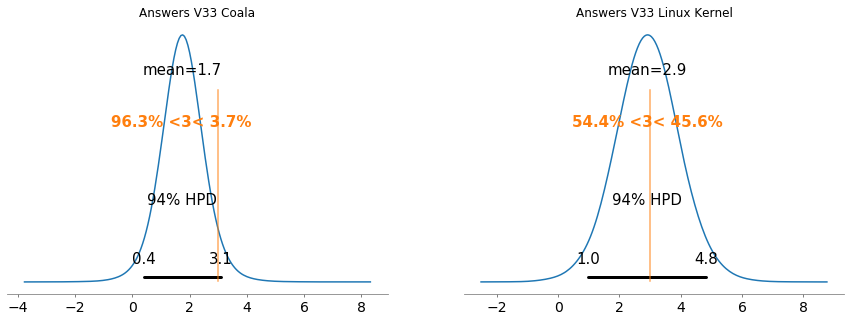

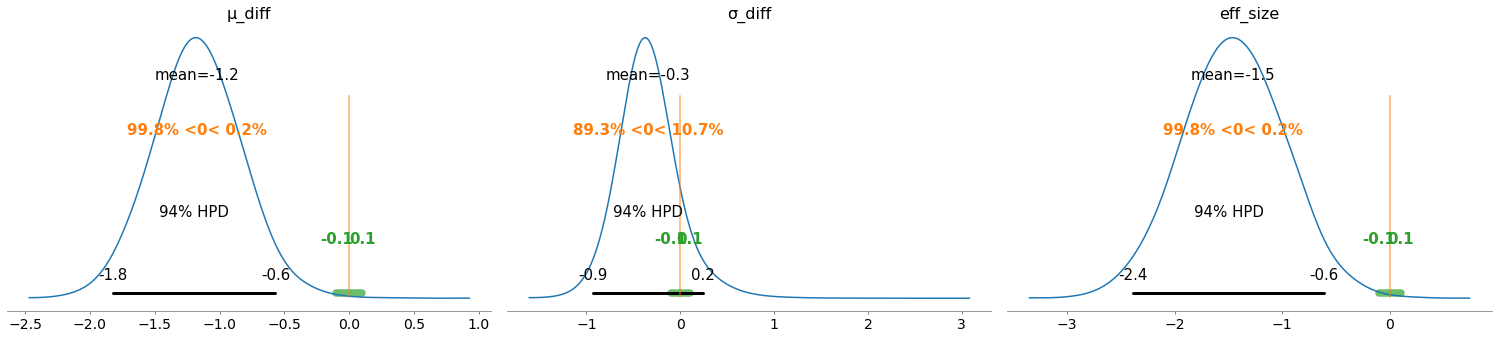

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
pm.plot_posterior(ppc_lenient_coala_vs_linuxkernel['obs_Coala'], ref_val=3, ax=ax1)
pm.plot_posterior(ppc_lenient_coala_vs_linuxkernel['obs_Linux_Kernel'], ref_val=3, ax=ax2)
ax1.set_title('Answers V33 Coala')
ax2.set_title('Answers V33 Linux Kernel')
pm.plot_posterior(trace_lenient_coala_vs_linuxkernel, var_names=['μ_diff','σ_diff','eff_size'], ref_val=0, rope=(-0.1,0.1))
plt.show()

#### Conclusion

The differences of means $\mu\_\mathit{diff}\,$ indicates that there is
a difference of 1.2 towards more lenient answers in the Coala
community. Furthermore, the posterior distribution of the effect size
suggest a nonzero difference well outside of a (-0.1,0.1) ROPE.

Consequently we can conclude that **hypothesis H7 is true**.


## Results Summary

| Hypotehsis | Results | Observations                                |
|------------|---------|---------------------------------------------|
| H1         | False   |                                             |
| H2         | True    |                                             |
| H3         | —       | To analyze                                  |
| H4         | ???     | There are no answers to V33 from DuckDuckGo |
| H5         | True    |                                             |
| H6         | —       | To analyze                                  |
| H7(BONUS)  | True    |                                             |


## What comes below is just random experiments not part of the report

[NOTE: Ignore this cell, I simply use it as a template when I run an experiment. That said, it gives a good overview of the structure of each section.]
### HX Title of hypothesis
#### Data
#### Model
#### Sampling
#### Plotting
#### Queries
#### Conclusion

In [24]:
## Protective Coala?
### If answers are negative to V28-V30 does it mean that the community
### is not protective?

##### NOTE: Positive is > agree (also after neutral)

Community = 'Comm.ROS'
v28 = df[(df.Community == Community) & (df.V28 != -1)].V28
v29 = df[(df.Community == Community) & (df.V29 != -1)].V29
v30 = df[(df.Community == Community) & (df.V30 != -1)].V30
v31 = df[(df.Community == Community) & (df.V31 != -1)].V31
v32 = df[(df.Community == Community) & (df.V32 != -1)].V32

with pm.Model() as model:
    μ28 = pm.Uniform('μ28', lower=1, upper=5)
    μ29 = pm.Uniform('μ29', lower=1, upper=5)
    μ30 = pm.Uniform('μ30', lower=1, upper=5)
    μ31 = pm.Uniform('μ31', lower=1, upper=5)
    μ32 = pm.Uniform('μ32', lower=1, upper=5)

    σ28 = pm.Uniform('σ28', lower=0, upper=4)
    σ29 = pm.Uniform('σ29', lower=0, upper=4)
    σ30 = pm.Uniform('σ30', lower=0, upper=4)
    σ31 = pm.Uniform('σ31', lower=0, upper=4)
    σ32 = pm.Uniform('σ32', lower=0, upper=4)

    obs28 = pm.Normal('obs28',mu=μ28,sigma=σ28,observed=v28)
    obs29 = pm.Normal('obs29',mu=μ29,sigma=σ29,observed=v29)
    obs30 = pm.Normal('obs30',mu=μ30,sigma=σ30,observed=v30)
    obs31 = pm.Normal('obs31',mu=μ31,sigma=σ31,observed=v31)
    obs32 = pm.Normal('obs32',mu=μ32,sigma=σ32,observed=v32)

In [25]:
with model:
    trace = pm.sample(10000,cores=2)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)


NUTS: [σ32, σ31, σ30, σ29, σ28, μ32, μ31, μ30, μ29, μ28]


Sampling 2 chains:   0%|          | 0/21000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 48/21000 [00:00<00:44, 472.17draws/s]

Sampling 2 chains:   0%|          | 100/21000 [00:00<00:43, 484.60draws/s]

Sampling 2 chains:   1%|          | 161/21000 [00:00<00:40, 516.31draws/s]

Sampling 2 chains:   1%|          | 217/21000 [00:00<00:39, 526.93draws/s]

Sampling 2 chains:   1%|▏         | 281/21000 [00:00<00:37, 552.40draws/s]

Sampling 2 chains:   2%|▏         | 345/21000 [00:00<00:36, 571.67draws/s]

Sampling 2 chains:   2%|▏         | 400/21000 [00:00<00:36, 563.21draws/s]

Sampling 2 chains:   2%|▏         | 463/21000 [00:00<00:35, 581.25draws/s]

Sampling 2 chains:   3%|▎         | 540/21000 [00:00<00:32, 626.84draws/s]

Sampling 2 chains:   3%|▎         | 610/21000 [00:01<00:31, 646.99draws/s]

Sampling 2 chains:   3%|▎         | 675/21000 [00:01<00:33, 609.15draws/s]

Sampling 2 chains:   4%|▎         | 755/21000 [00:01<00:30, 655.74draws/s]

Sampling 2 chains:   4%|▍         | 849/21000 [00:01<00:28, 719.58draws/s]

Sampling 2 chains:   4%|▍         | 939/21000 [00:01<00:26, 764.98draws/s]

Sampling 2 chains:   5%|▍         | 1028/21000 [00:01<00:25, 798.55draws/s]

Sampling 2 chains:   5%|▌         | 1113/21000 [00:01<00:24, 811.89draws/s]

Sampling 2 chains:   6%|▌         | 1208/21000 [00:01<00:23, 847.66draws/s]

Sampling 2 chains:   6%|▋         | 1314/21000 [00:01<00:21, 900.89draws/s]

Sampling 2 chains:   7%|▋         | 1407/21000 [00:01<00:22, 861.53draws/s]

Sampling 2 chains:   7%|▋         | 1499/21000 [00:02<00:22, 877.33draws/s]

Sampling 2 chains:   8%|▊         | 1589/21000 [00:02<00:22, 876.47draws/s]

Sampling 2 chains:   8%|▊         | 1682/21000 [00:02<00:21, 890.90draws/s]

Sampling 2 chains:   8%|▊         | 1776/21000 [00:02<00:21, 905.02draws/s]

Sampling 2 chains:   9%|▉         | 1868/21000 [00:02<00:21, 906.30draws/s]

Sampling 2 chains:   9%|▉         | 1962/21000 [00:02<00:20, 913.76draws/s]

Sampling 2 chains:  10%|▉         | 2054/21000 [00:02<00:21, 885.02draws/s]

Sampling 2 chains:  10%|█         | 2148/21000 [00:02<00:21, 896.40draws/s]

Sampling 2 chains:  11%|█         | 2242/21000 [00:02<00:20, 905.76draws/s]

Sampling 2 chains:  11%|█         | 2333/21000 [00:02<00:20, 894.69draws/s]

Sampling 2 chains:  12%|█▏        | 2423/21000 [00:03<00:23, 803.88draws/s]

Sampling 2 chains:  12%|█▏        | 2506/21000 [00:03<00:23, 777.37draws/s]

Sampling 2 chains:  12%|█▏        | 2586/21000 [00:03<00:23, 769.45draws/s]

Sampling 2 chains:  13%|█▎        | 2665/21000 [00:03<00:24, 761.74draws/s]

Sampling 2 chains:  13%|█▎        | 2759/21000 [00:03<00:22, 807.40draws/s]

Sampling 2 chains:  14%|█▎        | 2863/21000 [00:03<00:20, 864.94draws/s]

Sampling 2 chains:  14%|█▍        | 2958/21000 [00:03<00:20, 888.33draws/s]

Sampling 2 chains:  15%|█▍        | 3050/21000 [00:03<00:20, 893.22draws/s]

Sampling 2 chains:  15%|█▍        | 3142/21000 [00:03<00:19, 899.97draws/s]

Sampling 2 chains:  15%|█▌        | 3233/21000 [00:04<00:19, 902.57draws/s]

Sampling 2 chains:  16%|█▌        | 3324/21000 [00:04<00:19, 903.54draws/s]

Sampling 2 chains:  16%|█▋        | 3418/21000 [00:04<00:19, 911.98draws/s]

Sampling 2 chains:  17%|█▋        | 3510/21000 [00:04<00:19, 875.43draws/s]

Sampling 2 chains:  17%|█▋        | 3603/21000 [00:04<00:19, 886.83draws/s]

Sampling 2 chains:  18%|█▊        | 3695/21000 [00:04<00:19, 895.86draws/s]

Sampling 2 chains:  18%|█▊        | 3785/21000 [00:04<00:19, 864.88draws/s]

Sampling 2 chains:  18%|█▊        | 3872/21000 [00:04<00:21, 792.32draws/s]

Sampling 2 chains:  19%|█▉        | 3971/21000 [00:04<00:20, 842.58draws/s]

Sampling 2 chains:  19%|█▉        | 4072/21000 [00:05<00:19, 885.28draws/s]

Sampling 2 chains:  20%|█▉        | 4170/21000 [00:05<00:18, 910.81draws/s]

Sampling 2 chains:  20%|██        | 4269/21000 [00:05<00:17, 932.21draws/s]

Sampling 2 chains:  21%|██        | 4365/21000 [00:05<00:17, 939.74draws/s]

Sampling 2 chains:  21%|██        | 4461/21000 [00:05<00:17, 945.32draws/s]

Sampling 2 chains:  22%|██▏       | 4557/21000 [00:05<00:19, 864.61draws/s]

Sampling 2 chains:  22%|██▏       | 4646/21000 [00:05<00:19, 835.87draws/s]

Sampling 2 chains:  23%|██▎       | 4740/21000 [00:05<00:18, 862.68draws/s]

Sampling 2 chains:  23%|██▎       | 4830/21000 [00:05<00:18, 870.98draws/s]

Sampling 2 chains:  23%|██▎       | 4923/21000 [00:05<00:18, 884.78draws/s]

Sampling 2 chains:  24%|██▍       | 5015/21000 [00:06<00:17, 894.23draws/s]

Sampling 2 chains:  24%|██▍       | 5105/21000 [00:06<00:17, 894.49draws/s]

Sampling 2 chains:  25%|██▍       | 5195/21000 [00:06<00:18, 857.63draws/s]

Sampling 2 chains:  25%|██▌       | 5291/21000 [00:06<00:17, 883.22draws/s]

Sampling 2 chains:  26%|██▌       | 5383/21000 [00:06<00:17, 890.62draws/s]

Sampling 2 chains:  26%|██▌       | 5473/21000 [00:06<00:17, 872.80draws/s]

Sampling 2 chains:  26%|██▋       | 5564/21000 [00:06<00:17, 883.38draws/s]

Sampling 2 chains:  27%|██▋       | 5653/21000 [00:06<00:18, 825.36draws/s]

Sampling 2 chains:  27%|██▋       | 5738/21000 [00:06<00:18, 831.08draws/s]

Sampling 2 chains:  28%|██▊       | 5827/21000 [00:07<00:17, 846.56draws/s]

Sampling 2 chains:  28%|██▊       | 5917/21000 [00:07<00:17, 860.04draws/s]

Sampling 2 chains:  29%|██▊       | 6007/21000 [00:07<00:17, 871.47draws/s]

Sampling 2 chains:  29%|██▉       | 6095/21000 [00:07<00:17, 866.93draws/s]

Sampling 2 chains:  29%|██▉       | 6183/21000 [00:07<00:17, 870.24draws/s]

Sampling 2 chains:  30%|██▉       | 6280/21000 [00:07<00:16, 897.06draws/s]

Sampling 2 chains:  30%|███       | 6377/21000 [00:07<00:15, 916.84draws/s]

Sampling 2 chains:  31%|███       | 6470/21000 [00:07<00:15, 914.38draws/s]

Sampling 2 chains:  31%|███▏      | 6563/21000 [00:07<00:15, 918.22draws/s]

Sampling 2 chains:  32%|███▏      | 6658/21000 [00:07<00:15, 924.29draws/s]

Sampling 2 chains:  32%|███▏      | 6752/21000 [00:08<00:15, 928.13draws/s]

Sampling 2 chains:  33%|███▎      | 6845/21000 [00:08<00:16, 840.38draws/s]

Sampling 2 chains:  33%|███▎      | 6938/21000 [00:08<00:16, 864.97draws/s]

Sampling 2 chains:  33%|███▎      | 7026/21000 [00:08<00:16, 859.14draws/s]

Sampling 2 chains:  34%|███▍      | 7114/21000 [00:08<00:16, 864.98draws/s]

Sampling 2 chains:  34%|███▍      | 7202/21000 [00:08<00:16, 829.05draws/s]

Sampling 2 chains:  35%|███▍      | 7289/21000 [00:08<00:16, 840.79draws/s]

Sampling 2 chains:  35%|███▌      | 7377/21000 [00:08<00:16, 851.08draws/s]

Sampling 2 chains:  36%|███▌      | 7465/21000 [00:08<00:15, 856.04draws/s]

Sampling 2 chains:  36%|███▌      | 7553/21000 [00:08<00:15, 861.58draws/s]

Sampling 2 chains:  36%|███▋      | 7642/21000 [00:09<00:15, 869.20draws/s]

Sampling 2 chains:  37%|███▋      | 7732/21000 [00:09<00:15, 876.34draws/s]

Sampling 2 chains:  37%|███▋      | 7823/21000 [00:09<00:14, 886.10draws/s]

Sampling 2 chains:  38%|███▊      | 7912/21000 [00:09<00:14, 881.57draws/s]

Sampling 2 chains:  38%|███▊      | 8001/21000 [00:09<00:14, 876.19draws/s]

Sampling 2 chains:  39%|███▊      | 8089/21000 [00:09<00:15, 828.18draws/s]

Sampling 2 chains:  39%|███▉      | 8181/21000 [00:09<00:15, 853.29draws/s]

Sampling 2 chains:  39%|███▉      | 8273/21000 [00:09<00:14, 871.06draws/s]

Sampling 2 chains:  40%|███▉      | 8368/21000 [00:09<00:14, 889.48draws/s]

Sampling 2 chains:  40%|████      | 8466/21000 [00:10<00:13, 913.94draws/s]

Sampling 2 chains:  41%|████      | 8558/21000 [00:10<00:13, 915.47draws/s]

Sampling 2 chains:  41%|████      | 8650/21000 [00:10<00:13, 888.86draws/s]

Sampling 2 chains:  42%|████▏     | 8740/21000 [00:10<00:13, 884.00draws/s]

Sampling 2 chains:  42%|████▏     | 8830/21000 [00:10<00:13, 886.77draws/s]

Sampling 2 chains:  42%|████▏     | 8920/21000 [00:10<00:13, 890.10draws/s]

Sampling 2 chains:  43%|████▎     | 9010/21000 [00:10<00:14, 849.30draws/s]

Sampling 2 chains:  43%|████▎     | 9096/21000 [00:10<00:14, 840.28draws/s]

Sampling 2 chains:  44%|████▍     | 9191/21000 [00:10<00:13, 869.52draws/s]

Sampling 2 chains:  44%|████▍     | 9288/21000 [00:10<00:13, 893.65draws/s]

Sampling 2 chains:  45%|████▍     | 9382/21000 [00:11<00:12, 904.98draws/s]

Sampling 2 chains:  45%|████▌     | 9476/21000 [00:11<00:12, 913.01draws/s]

Sampling 2 chains:  46%|████▌     | 9568/21000 [00:11<00:13, 840.93draws/s]

Sampling 2 chains:  46%|████▌     | 9665/21000 [00:11<00:12, 874.90draws/s]

Sampling 2 chains:  46%|████▋     | 9761/21000 [00:11<00:12, 898.54draws/s]

Sampling 2 chains:  47%|████▋     | 9852/21000 [00:11<00:13, 828.08draws/s]

Sampling 2 chains:  47%|████▋     | 9937/21000 [00:11<00:13, 813.35draws/s]

Sampling 2 chains:  48%|████▊     | 10033/21000 [00:11<00:12, 850.98draws/s]

Sampling 2 chains:  48%|████▊     | 10125/21000 [00:11<00:12, 870.11draws/s]

Sampling 2 chains:  49%|████▊     | 10214/21000 [00:12<00:12, 834.34draws/s]

Sampling 2 chains:  49%|████▉     | 10304/21000 [00:12<00:12, 851.49draws/s]

Sampling 2 chains:  50%|████▉     | 10395/21000 [00:12<00:12, 867.74draws/s]

Sampling 2 chains:  50%|████▉     | 10483/21000 [00:12<00:12, 869.27draws/s]

Sampling 2 chains:  50%|█████     | 10571/21000 [00:12<00:13, 774.50draws/s]

Sampling 2 chains:  51%|█████     | 10667/21000 [00:12<00:12, 821.70draws/s]

Sampling 2 chains:  51%|█████     | 10752/21000 [00:12<00:12, 808.26draws/s]

Sampling 2 chains:  52%|█████▏    | 10835/21000 [00:12<00:12, 814.62draws/s]

Sampling 2 chains:  52%|█████▏    | 10923/21000 [00:12<00:12, 830.89draws/s]

Sampling 2 chains:  52%|█████▏    | 11009/21000 [00:12<00:11, 839.33draws/s]

Sampling 2 chains:  53%|█████▎    | 11097/21000 [00:13<00:11, 849.93draws/s]

Sampling 2 chains:  53%|█████▎    | 11187/21000 [00:13<00:11, 863.70draws/s]

Sampling 2 chains:  54%|█████▎    | 11274/21000 [00:13<00:11, 825.81draws/s]

Sampling 2 chains:  54%|█████▍    | 11362/21000 [00:13<00:11, 840.81draws/s]

Sampling 2 chains:  55%|█████▍    | 11447/21000 [00:13<00:11, 841.87draws/s]

Sampling 2 chains:  55%|█████▍    | 11537/21000 [00:13<00:11, 858.19draws/s]

Sampling 2 chains:  55%|█████▌    | 11624/21000 [00:13<00:11, 810.04draws/s]

Sampling 2 chains:  56%|█████▌    | 11720/21000 [00:13<00:10, 848.88draws/s]

Sampling 2 chains:  56%|█████▋    | 11818/21000 [00:13<00:10, 881.93draws/s]

Sampling 2 chains:  57%|█████▋    | 11912/21000 [00:14<00:10, 895.74draws/s]

Sampling 2 chains:  57%|█████▋    | 12007/21000 [00:14<00:09, 909.50draws/s]

Sampling 2 chains:  58%|█████▊    | 12099/21000 [00:14<00:09, 901.81draws/s]

Sampling 2 chains:  58%|█████▊    | 12190/21000 [00:14<00:09, 897.32draws/s]

Sampling 2 chains:  58%|█████▊    | 12281/21000 [00:14<00:09, 891.56draws/s]

Sampling 2 chains:  59%|█████▉    | 12371/21000 [00:14<00:09, 892.52draws/s]

Sampling 2 chains:  59%|█████▉    | 12461/21000 [00:14<00:09, 874.09draws/s]

Sampling 2 chains:  60%|█████▉    | 12549/21000 [00:14<00:10, 808.69draws/s]

Sampling 2 chains:  60%|██████    | 12637/21000 [00:14<00:10, 828.54draws/s]

Sampling 2 chains:  61%|██████    | 12727/21000 [00:14<00:09, 847.90draws/s]

Sampling 2 chains:  61%|██████    | 12817/21000 [00:15<00:09, 861.55draws/s]

Sampling 2 chains:  61%|██████▏   | 12905/21000 [00:15<00:09, 864.97draws/s]

Sampling 2 chains:  62%|██████▏   | 12992/21000 [00:15<00:09, 861.24draws/s]

Sampling 2 chains:  62%|██████▏   | 13080/21000 [00:15<00:09, 866.64draws/s]

Sampling 2 chains:  63%|██████▎   | 13170/21000 [00:15<00:08, 872.98draws/s]

Sampling 2 chains:  63%|██████▎   | 13260/21000 [00:15<00:08, 878.97draws/s]

Sampling 2 chains:  64%|██████▎   | 13350/21000 [00:15<00:08, 883.27draws/s]

Sampling 2 chains:  64%|██████▍   | 13439/21000 [00:15<00:09, 834.54draws/s]

Sampling 2 chains:  64%|██████▍   | 13528/21000 [00:15<00:08, 848.91draws/s]

Sampling 2 chains:  65%|██████▍   | 13615/21000 [00:16<00:08, 854.67draws/s]

Sampling 2 chains:  65%|██████▌   | 13710/21000 [00:16<00:08, 879.83draws/s]

Sampling 2 chains:  66%|██████▌   | 13799/21000 [00:16<00:08, 880.07draws/s]

Sampling 2 chains:  66%|██████▌   | 13889/21000 [00:16<00:08, 885.21draws/s]

Sampling 2 chains:  67%|██████▋   | 13980/21000 [00:16<00:07, 892.44draws/s]

Sampling 2 chains:  67%|██████▋   | 14070/21000 [00:16<00:07, 886.13draws/s]

Sampling 2 chains:  67%|██████▋   | 14159/21000 [00:16<00:07, 870.63draws/s]

Sampling 2 chains:  68%|██████▊   | 14252/21000 [00:16<00:07, 885.61draws/s]

Sampling 2 chains:  68%|██████▊   | 14341/21000 [00:16<00:07, 837.80draws/s]

Sampling 2 chains:  69%|██████▊   | 14426/21000 [00:16<00:08, 808.70draws/s]

Sampling 2 chains:  69%|██████▉   | 14509/21000 [00:17<00:07, 814.25draws/s]

Sampling 2 chains:  70%|██████▉   | 14598/21000 [00:17<00:07, 833.82draws/s]

Sampling 2 chains:  70%|██████▉   | 14688/21000 [00:17<00:07, 850.87draws/s]

Sampling 2 chains:  70%|███████   | 14776/21000 [00:17<00:07, 858.95draws/s]

Sampling 2 chains:  71%|███████   | 14866/21000 [00:17<00:07, 869.27draws/s]

Sampling 2 chains:  71%|███████   | 14956/21000 [00:17<00:06, 875.47draws/s]

Sampling 2 chains:  72%|███████▏  | 15049/21000 [00:17<00:06, 890.22draws/s]

Sampling 2 chains:  72%|███████▏  | 15146/21000 [00:17<00:06, 910.82draws/s]

Sampling 2 chains:  73%|███████▎  | 15240/21000 [00:17<00:06, 916.55draws/s]

Sampling 2 chains:  73%|███████▎  | 15334/21000 [00:17<00:06, 922.27draws/s]

Sampling 2 chains:  73%|███████▎  | 15427/21000 [00:18<00:06, 910.19draws/s]

Sampling 2 chains:  74%|███████▍  | 15519/21000 [00:18<00:06, 903.81draws/s]

Sampling 2 chains:  74%|███████▍  | 15610/21000 [00:18<00:06, 893.82draws/s]

Sampling 2 chains:  75%|███████▍  | 15700/21000 [00:18<00:05, 891.21draws/s]

Sampling 2 chains:  75%|███████▌  | 15790/21000 [00:18<00:05, 887.75draws/s]

Sampling 2 chains:  76%|███████▌  | 15879/21000 [00:18<00:05, 885.17draws/s]

Sampling 2 chains:  76%|███████▌  | 15968/21000 [00:18<00:05, 880.09draws/s]

Sampling 2 chains:  76%|███████▋  | 16057/21000 [00:18<00:05, 877.56draws/s]

Sampling 2 chains:  77%|███████▋  | 16145/21000 [00:18<00:05, 823.66draws/s]

Sampling 2 chains:  77%|███████▋  | 16237/21000 [00:19<00:05, 849.30draws/s]

Sampling 2 chains:  78%|███████▊  | 16323/21000 [00:19<00:05, 784.40draws/s]

Sampling 2 chains:  78%|███████▊  | 16403/21000 [00:19<00:06, 690.30draws/s]

Sampling 2 chains:  78%|███████▊  | 16479/21000 [00:19<00:06, 709.31draws/s]

Sampling 2 chains:  79%|███████▉  | 16567/21000 [00:19<00:05, 751.78draws/s]

Sampling 2 chains:  79%|███████▉  | 16645/21000 [00:19<00:05, 744.56draws/s]

Sampling 2 chains:  80%|███████▉  | 16723/21000 [00:19<00:05, 753.42draws/s]

Sampling 2 chains:  80%|████████  | 16812/21000 [00:19<00:05, 787.04draws/s]

Sampling 2 chains:  80%|████████  | 16901/21000 [00:19<00:05, 813.77draws/s]

Sampling 2 chains:  81%|████████  | 16990/21000 [00:19<00:04, 833.09draws/s]

Sampling 2 chains:  81%|████████▏ | 17078/21000 [00:20<00:04, 845.52draws/s]

Sampling 2 chains:  82%|████████▏ | 17166/21000 [00:20<00:04, 854.78draws/s]

Sampling 2 chains:  82%|████████▏ | 17252/21000 [00:20<00:04, 845.47draws/s]

Sampling 2 chains:  83%|████████▎ | 17337/21000 [00:20<00:04, 818.91draws/s]

Sampling 2 chains:  83%|████████▎ | 17420/21000 [00:20<00:04, 762.27draws/s]

Sampling 2 chains:  83%|████████▎ | 17498/21000 [00:20<00:04, 745.93draws/s]

Sampling 2 chains:  84%|████████▎ | 17574/21000 [00:20<00:04, 747.92draws/s]

Sampling 2 chains:  84%|████████▍ | 17664/21000 [00:20<00:04, 786.91draws/s]

Sampling 2 chains:  85%|████████▍ | 17747/21000 [00:20<00:04, 799.04draws/s]

Sampling 2 chains:  85%|████████▍ | 17837/21000 [00:21<00:03, 826.23draws/s]

Sampling 2 chains:  85%|████████▌ | 17921/21000 [00:21<00:03, 827.54draws/s]

Sampling 2 chains:  86%|████████▌ | 18009/21000 [00:21<00:03, 841.94draws/s]

Sampling 2 chains:  86%|████████▌ | 18096/21000 [00:21<00:03, 849.37draws/s]

Sampling 2 chains:  87%|████████▋ | 18186/21000 [00:21<00:03, 861.81draws/s]

Sampling 2 chains:  87%|████████▋ | 18277/21000 [00:21<00:03, 875.37draws/s]

Sampling 2 chains:  87%|████████▋ | 18369/21000 [00:21<00:02, 887.25draws/s]

Sampling 2 chains:  88%|████████▊ | 18458/21000 [00:21<00:02, 887.64draws/s]

Sampling 2 chains:  88%|████████▊ | 18547/21000 [00:21<00:02, 864.91draws/s]

Sampling 2 chains:  89%|████████▊ | 18636/21000 [00:21<00:02, 869.78draws/s]

Sampling 2 chains:  89%|████████▉ | 18724/21000 [00:22<00:02, 857.08draws/s]

Sampling 2 chains:  90%|████████▉ | 18816/21000 [00:22<00:02, 874.32draws/s]

Sampling 2 chains:  90%|█████████ | 18904/21000 [00:22<00:02, 845.67draws/s]

Sampling 2 chains:  90%|█████████ | 18989/21000 [00:22<00:02, 815.40draws/s]

Sampling 2 chains:  91%|█████████ | 19072/21000 [00:22<00:02, 814.39draws/s]

Sampling 2 chains:  91%|█████████ | 19158/21000 [00:22<00:02, 823.62draws/s]

Sampling 2 chains:  92%|█████████▏| 19248/21000 [00:22<00:02, 843.73draws/s]

Sampling 2 chains:  92%|█████████▏| 19333/21000 [00:22<00:02, 775.00draws/s]

Sampling 2 chains:  93%|█████████▎| 19433/21000 [00:22<00:01, 830.03draws/s]

Sampling 2 chains:  93%|█████████▎| 19534/21000 [00:23<00:01, 875.89draws/s]

Sampling 2 chains:  93%|█████████▎| 19630/21000 [00:23<00:01, 898.63draws/s]

Sampling 2 chains:  94%|█████████▍| 19724/21000 [00:23<00:01, 906.22draws/s]

Sampling 2 chains:  94%|█████████▍| 19816/21000 [00:23<00:01, 906.87draws/s]

Sampling 2 chains:  95%|█████████▍| 19908/21000 [00:23<00:01, 902.73draws/s]

Sampling 2 chains:  95%|█████████▌| 20000/21000 [00:23<00:01, 906.98draws/s]

Sampling 2 chains:  96%|█████████▌| 20092/21000 [00:23<00:01, 875.00draws/s]

Sampling 2 chains:  96%|█████████▌| 20181/21000 [00:23<00:00, 828.24draws/s]

Sampling 2 chains:  96%|█████████▋| 20265/21000 [00:23<00:00, 792.37draws/s]

Sampling 2 chains:  97%|█████████▋| 20346/21000 [00:24<00:00, 743.11draws/s]

Sampling 2 chains:  97%|█████████▋| 20432/21000 [00:24<00:00, 774.56draws/s]

Sampling 2 chains:  98%|█████████▊| 20518/21000 [00:24<00:00, 794.65draws/s]

Sampling 2 chains:  98%|█████████▊| 20609/21000 [00:24<00:00, 823.19draws/s]

Sampling 2 chains:  99%|█████████▊| 20693/21000 [00:24<00:00, 643.01draws/s]

Sampling 2 chains:  99%|█████████▉| 20765/21000 [00:24<00:00, 552.47draws/s]

Sampling 2 chains:  99%|█████████▉| 20828/21000 [00:24<00:00, 486.18draws/s]

Sampling 2 chains:  99%|█████████▉| 20883/21000 [00:24<00:00, 470.47draws/s]

Sampling 2 chains: 100%|█████████▉| 20935/21000 [00:25<00:00, 459.94draws/s]

Sampling 2 chains: 100%|█████████▉| 20985/21000 [00:25<00:00, 452.37draws/s]

Sampling 2 chains: 100%|██████████| 21000/21000 [00:25<00:00, 831.37draws/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effd1c77278>,
      dtype=object)

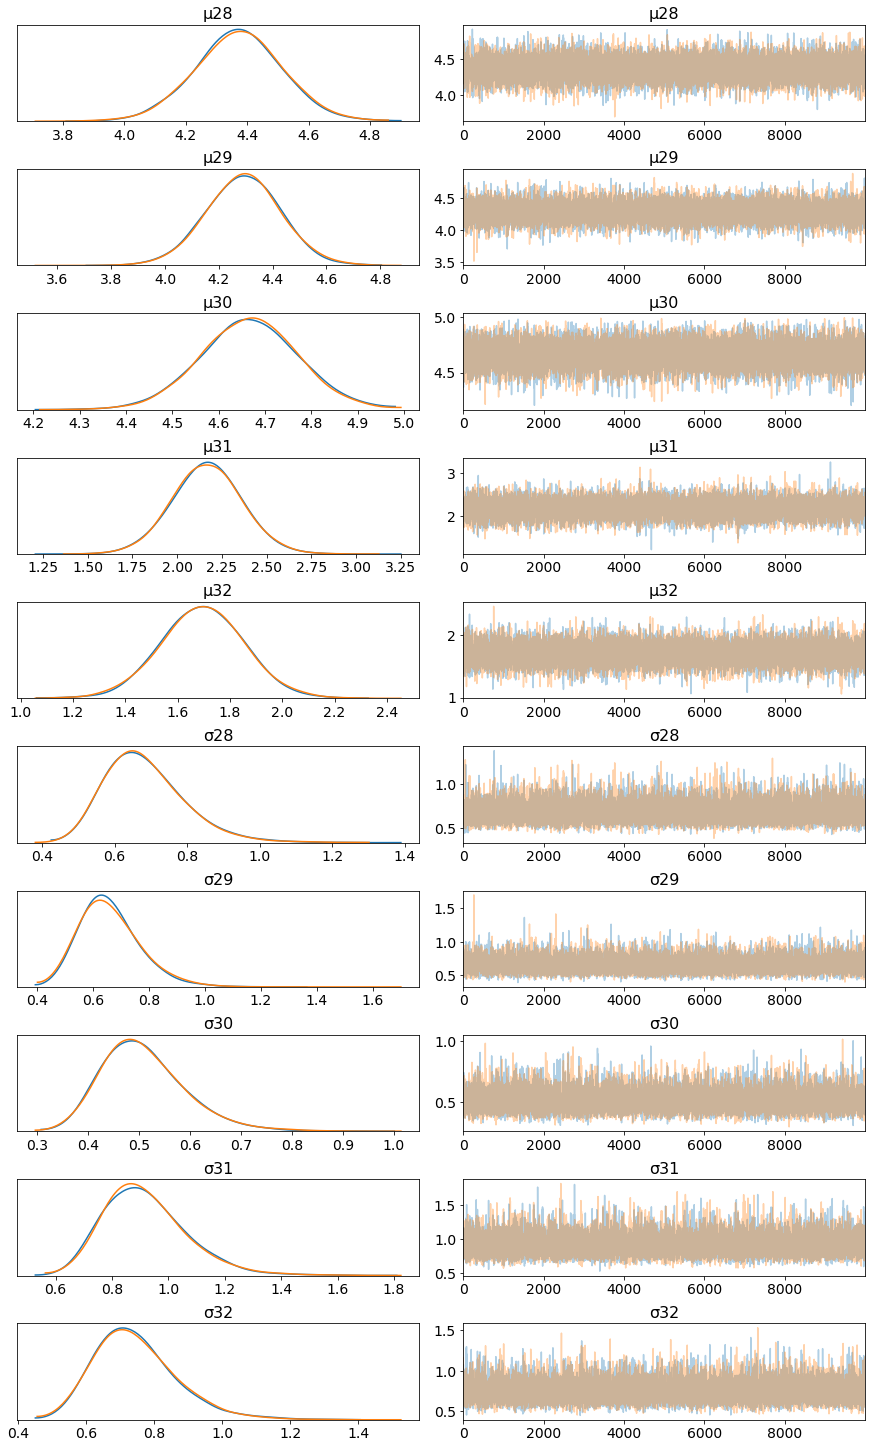

In [26]:
pm.traceplot(trace)

In [27]:
## TO DISCUSS: I put as a condition > .95 instead of == 1.0 because ==
## 1.0 is hard to get. Also we should adjust for noise.

def protective(trace):
    return (np.mean(trace['obs28'] < 3.0) > .95 or
            np.mean(trace['obs29'] < 3.0) > .95 or
            np.mean(trace['obs30'] < 3.0) > .95)

def equitable(trace):
    return (np.mean(trace['obs31'] < 3.0) > .95 or
            np.mean(trace['obs32'] < 3.0) > .95)

In [28]:
ppc = pm.sample_posterior_predictive(trace, samples=5000, model=model)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:00<18:17,  4.55it/s]

  0%|          | 20/5000 [00:00<12:53,  6.44it/s]

  1%|          | 46/5000 [00:00<09:04,  9.10it/s]

  2%|▏         | 75/5000 [00:00<06:24, 12.82it/s]

  2%|▏         | 104/5000 [00:00<04:32, 17.96it/s]

  3%|▎         | 133/5000 [00:00<03:14, 24.99it/s]

  3%|▎         | 162/5000 [00:00<02:20, 34.40it/s]

  4%|▍         | 192/5000 [00:00<01:42, 46.77it/s]

  4%|▍         | 222/5000 [00:01<01:16, 62.51it/s]

  5%|▌         | 251/5000 [00:01<00:58, 81.67it/s]

  6%|▌         | 280/5000 [00:01<00:45, 104.07it/s]

  6%|▌         | 310/5000 [00:01<00:36, 129.06it/s]

  7%|▋         | 340/5000 [00:01<00:30, 155.13it/s]

  7%|▋         | 369/5000 [00:01<00:26, 174.71it/s]

  8%|▊         | 397/5000 [00:01<00:24, 191.40it/s]

  8%|▊         | 424/5000 [00:01<00:22, 204.31it/s]

  9%|▉         | 450/5000 [00:01<00:21, 216.59it/s]

 10%|▉         | 476/5000 [00:02<00:20, 215.89it/s]

 10%|█         | 501/5000 [00:02<00:21, 204.60it/s]

 10%|█         | 524/5000 [00:02<00:22, 197.68it/s]

 11%|█         | 547/5000 [00:02<00:21, 205.11it/s]

 11%|█▏        | 569/5000 [00:02<00:21, 208.34it/s]

 12%|█▏        | 594/5000 [00:02<00:20, 218.10it/s]

 12%|█▏        | 619/5000 [00:02<00:19, 226.04it/s]

 13%|█▎        | 643/5000 [00:02<00:18, 229.70it/s]

 13%|█▎        | 669/5000 [00:02<00:18, 237.82it/s]

 14%|█▍        | 695/5000 [00:02<00:17, 242.56it/s]

 14%|█▍        | 720/5000 [00:03<00:17, 244.21it/s]

 15%|█▍        | 745/5000 [00:03<00:17, 242.22it/s]

 15%|█▌        | 770/5000 [00:03<00:18, 232.58it/s]

 16%|█▌        | 794/5000 [00:03<00:18, 225.60it/s]

 16%|█▋        | 818/5000 [00:03<00:18, 228.71it/s]

 17%|█▋        | 844/5000 [00:03<00:17, 235.32it/s]

 17%|█▋        | 870/5000 [00:03<00:17, 240.49it/s]

 18%|█▊        | 896/5000 [00:03<00:16, 244.11it/s]

 18%|█▊        | 922/5000 [00:03<00:16, 246.70it/s]

 19%|█▉        | 949/5000 [00:04<00:16, 250.66it/s]

 20%|█▉        | 975/5000 [00:04<00:15, 252.11it/s]

 20%|██        | 1001/5000 [00:04<00:15, 251.44it/s]

 21%|██        | 1027/5000 [00:04<00:15, 250.64it/s]

 21%|██        | 1053/5000 [00:04<00:15, 251.81it/s]

 22%|██▏       | 1079/5000 [00:04<00:15, 254.12it/s]

 22%|██▏       | 1105/5000 [00:04<00:15, 243.91it/s]

 23%|██▎       | 1130/5000 [00:04<00:17, 224.64it/s]

 23%|██▎       | 1153/5000 [00:04<00:17, 224.25it/s]

 24%|██▎       | 1176/5000 [00:05<00:17, 223.67it/s]

 24%|██▍       | 1199/5000 [00:05<00:17, 222.34it/s]

 25%|██▍       | 1227/5000 [00:05<00:16, 235.61it/s]

 25%|██▌       | 1254/5000 [00:05<00:15, 244.14it/s]

 26%|██▌       | 1284/5000 [00:05<00:14, 256.78it/s]

 26%|██▌       | 1311/5000 [00:05<00:14, 259.86it/s]

 27%|██▋       | 1338/5000 [00:05<00:14, 256.51it/s]

 27%|██▋       | 1364/5000 [00:05<00:14, 256.38it/s]

 28%|██▊       | 1390/5000 [00:05<00:14, 246.96it/s]

 28%|██▊       | 1415/5000 [00:05<00:14, 247.63it/s]

 29%|██▉       | 1442/5000 [00:06<00:14, 250.27it/s]

 29%|██▉       | 1471/5000 [00:06<00:13, 260.96it/s]

 30%|██▉       | 1499/5000 [00:06<00:13, 264.33it/s]

 31%|███       | 1527/5000 [00:06<00:13, 267.14it/s]

 31%|███       | 1558/5000 [00:06<00:12, 276.71it/s]

 32%|███▏      | 1587/5000 [00:06<00:12, 278.39it/s]

 32%|███▏      | 1617/5000 [00:06<00:11, 284.36it/s]

 33%|███▎      | 1647/5000 [00:06<00:11, 287.26it/s]

 34%|███▎      | 1677/5000 [00:06<00:11, 289.70it/s]

 34%|███▍      | 1707/5000 [00:06<00:11, 292.37it/s]

 35%|███▍      | 1738/5000 [00:07<00:11, 294.80it/s]

 35%|███▌      | 1768/5000 [00:07<00:10, 295.07it/s]

 36%|███▌      | 1798/5000 [00:07<00:10, 295.65it/s]

 37%|███▋      | 1828/5000 [00:07<00:10, 289.56it/s]

 37%|███▋      | 1857/5000 [00:07<00:11, 283.84it/s]

 38%|███▊      | 1886/5000 [00:07<00:11, 278.33it/s]

 38%|███▊      | 1914/5000 [00:07<00:11, 263.17it/s]

 39%|███▉      | 1941/5000 [00:07<00:11, 256.49it/s]

 39%|███▉      | 1967/5000 [00:07<00:11, 256.68it/s]

 40%|███▉      | 1993/5000 [00:08<00:11, 253.87it/s]

 40%|████      | 2020/5000 [00:08<00:11, 257.56it/s]

 41%|████      | 2046/5000 [00:08<00:11, 255.85it/s]

 41%|████▏     | 2073/5000 [00:08<00:11, 259.11it/s]

 42%|████▏     | 2100/5000 [00:08<00:11, 260.84it/s]

 43%|████▎     | 2127/5000 [00:08<00:10, 262.15it/s]

 43%|████▎     | 2154/5000 [00:08<00:10, 263.47it/s]

 44%|████▎     | 2181/5000 [00:08<00:10, 262.51it/s]

 44%|████▍     | 2208/5000 [00:08<00:10, 263.67it/s]

 45%|████▍     | 2235/5000 [00:08<00:10, 263.69it/s]

 45%|████▌     | 2262/5000 [00:09<00:10, 261.52it/s]

 46%|████▌     | 2289/5000 [00:09<00:10, 257.55it/s]

 46%|████▋     | 2316/5000 [00:09<00:10, 259.54it/s]

 47%|████▋     | 2343/5000 [00:09<00:10, 262.14it/s]

 47%|████▋     | 2370/5000 [00:09<00:09, 263.83it/s]

 48%|████▊     | 2397/5000 [00:09<00:09, 262.27it/s]

 48%|████▊     | 2424/5000 [00:09<00:09, 261.70it/s]

 49%|████▉     | 2451/5000 [00:09<00:09, 262.45it/s]

 50%|████▉     | 2478/5000 [00:09<00:09, 263.47it/s]

 50%|█████     | 2505/5000 [00:09<00:09, 262.92it/s]

 51%|█████     | 2532/5000 [00:10<00:09, 262.87it/s]

 51%|█████     | 2559/5000 [00:10<00:09, 262.82it/s]

 52%|█████▏    | 2586/5000 [00:10<00:09, 262.63it/s]

 52%|█████▏    | 2614/5000 [00:10<00:08, 267.13it/s]

 53%|█████▎    | 2644/5000 [00:10<00:08, 274.04it/s]

 53%|█████▎    | 2673/5000 [00:10<00:08, 276.24it/s]

 54%|█████▍    | 2701/5000 [00:10<00:08, 277.21it/s]

 55%|█████▍    | 2730/5000 [00:10<00:08, 279.93it/s]

 55%|█████▌    | 2759/5000 [00:10<00:07, 280.64it/s]

 56%|█████▌    | 2790/5000 [00:11<00:07, 287.34it/s]

 56%|█████▋    | 2820/5000 [00:11<00:07, 290.29it/s]

 57%|█████▋    | 2850/5000 [00:11<00:07, 286.75it/s]

 58%|█████▊    | 2879/5000 [00:11<00:07, 286.17it/s]

 58%|█████▊    | 2910/5000 [00:11<00:07, 290.67it/s]

 59%|█████▉    | 2940/5000 [00:11<00:07, 292.51it/s]

 59%|█████▉    | 2970/5000 [00:11<00:06, 294.24it/s]

 60%|██████    | 3001/5000 [00:11<00:06, 296.10it/s]

 61%|██████    | 3031/5000 [00:11<00:06, 291.55it/s]

 61%|██████    | 3061/5000 [00:11<00:06, 291.69it/s]

 62%|██████▏   | 3092/5000 [00:12<00:06, 294.30it/s]

 62%|██████▏   | 3122/5000 [00:12<00:06, 290.80it/s]

 63%|██████▎   | 3153/5000 [00:12<00:06, 293.79it/s]

 64%|██████▎   | 3183/5000 [00:12<00:06, 290.67it/s]

 64%|██████▍   | 3213/5000 [00:12<00:06, 288.41it/s]

 65%|██████▍   | 3242/5000 [00:12<00:06, 285.74it/s]

 65%|██████▌   | 3271/5000 [00:12<00:06, 284.41it/s]

 66%|██████▌   | 3300/5000 [00:12<00:06, 262.58it/s]

 67%|██████▋   | 3328/5000 [00:12<00:06, 267.42it/s]

 67%|██████▋   | 3357/5000 [00:12<00:06, 272.91it/s]

 68%|██████▊   | 3386/5000 [00:13<00:05, 277.07it/s]

 68%|██████▊   | 3416/5000 [00:13<00:05, 283.32it/s]

 69%|██████▉   | 3447/5000 [00:13<00:05, 288.99it/s]

 70%|██████▉   | 3478/5000 [00:13<00:05, 292.52it/s]

 70%|███████   | 3509/5000 [00:13<00:05, 295.65it/s]

 71%|███████   | 3540/5000 [00:13<00:04, 297.56it/s]

 71%|███████▏  | 3571/5000 [00:13<00:04, 298.47it/s]

 72%|███████▏  | 3601/5000 [00:13<00:04, 293.50it/s]

 73%|███████▎  | 3631/5000 [00:13<00:04, 290.56it/s]

 73%|███████▎  | 3661/5000 [00:14<00:04, 289.23it/s]

 74%|███████▍  | 3690/5000 [00:14<00:04, 283.50it/s]

 74%|███████▍  | 3720/5000 [00:14<00:04, 287.67it/s]

 75%|███████▌  | 3751/5000 [00:14<00:04, 291.40it/s]

 76%|███████▌  | 3782/5000 [00:14<00:04, 294.10it/s]

 76%|███████▋  | 3813/5000 [00:14<00:04, 295.88it/s]

 77%|███████▋  | 3843/5000 [00:14<00:03, 297.00it/s]

 77%|███████▋  | 3874/5000 [00:14<00:03, 299.22it/s]

 78%|███████▊  | 3905/5000 [00:14<00:03, 299.72it/s]

 79%|███████▊  | 3935/5000 [00:14<00:03, 272.67it/s]

 79%|███████▉  | 3963/5000 [00:15<00:03, 261.12it/s]

 80%|███████▉  | 3994/5000 [00:15<00:03, 273.50it/s]

 80%|████████  | 4024/5000 [00:15<00:03, 280.88it/s]

 81%|████████  | 4053/5000 [00:15<00:03, 280.34it/s]

 82%|████████▏ | 4082/5000 [00:15<00:03, 281.26it/s]

 82%|████████▏ | 4111/5000 [00:15<00:03, 282.05it/s]

 83%|████████▎ | 4140/5000 [00:15<00:03, 280.90it/s]

 83%|████████▎ | 4169/5000 [00:15<00:02, 281.77it/s]

 84%|████████▍ | 4200/5000 [00:15<00:02, 287.86it/s]

 85%|████████▍ | 4230/5000 [00:16<00:02, 290.77it/s]

 85%|████████▌ | 4260/5000 [00:16<00:02, 290.42it/s]

 86%|████████▌ | 4291/5000 [00:16<00:02, 293.67it/s]

 86%|████████▋ | 4322/5000 [00:16<00:02, 295.95it/s]

 87%|████████▋ | 4352/5000 [00:16<00:02, 296.61it/s]

 88%|████████▊ | 4382/5000 [00:16<00:02, 295.00it/s]

 88%|████████▊ | 4412/5000 [00:16<00:02, 266.48it/s]

 89%|████████▉ | 4440/5000 [00:16<00:02, 250.24it/s]

 89%|████████▉ | 4466/5000 [00:16<00:02, 239.88it/s]

 90%|████████▉ | 4496/5000 [00:17<00:01, 254.49it/s]

 91%|█████████ | 4526/5000 [00:17<00:01, 265.14it/s]

 91%|█████████ | 4555/5000 [00:17<00:01, 270.85it/s]

 92%|█████████▏| 4586/5000 [00:17<00:01, 280.29it/s]

 92%|█████████▏| 4615/5000 [00:17<00:01, 282.07it/s]

 93%|█████████▎| 4644/5000 [00:17<00:01, 282.24it/s]

 93%|█████████▎| 4673/5000 [00:17<00:01, 281.91it/s]

 94%|█████████▍| 4704/5000 [00:17<00:01, 287.94it/s]

 95%|█████████▍| 4734/5000 [00:17<00:00, 290.43it/s]

 95%|█████████▌| 4765/5000 [00:17<00:00, 293.66it/s]

 96%|█████████▌| 4795/5000 [00:18<00:00, 274.32it/s]

 96%|█████████▋| 4823/5000 [00:18<00:00, 272.48it/s]

 97%|█████████▋| 4851/5000 [00:18<00:00, 267.21it/s]

 98%|█████████▊| 4878/5000 [00:18<00:00, 266.86it/s]

 98%|█████████▊| 4905/5000 [00:18<00:00, 264.00it/s]

 99%|█████████▊| 4932/5000 [00:18<00:00, 264.82it/s]

 99%|█████████▉| 4959/5000 [00:18<00:00, 265.54it/s]

100%|█████████▉| 4986/5000 [00:18<00:00, 263.30it/s]

100%|██████████| 5000/5000 [00:18<00:00, 265.39it/s]

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:123: SyntaxWarning: More chains (5000) than draws (24). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7effd1641d68>],
      dtype=object)

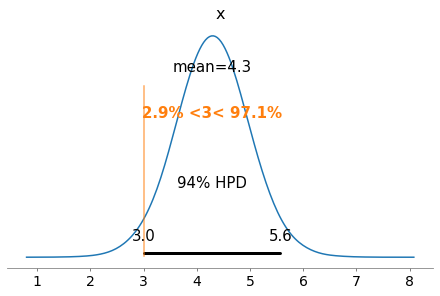

In [29]:
pm.plot_posterior(ppc['obs29'],ref_val=3)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7effd16d6160>],
      dtype=object)

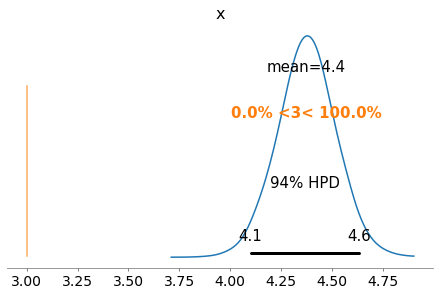

In [30]:
pm.plot_posterior(trace['μ28'],ref_val=3)

In [31]:
print("The community " + Community + " is" + ("" if protective(ppc) else " not") + " protective")
print("The community " + Community + " is" + ("" if equitable(ppc) else " not") + " equitable")

The community Comm.ROS is not protective
The community Comm.ROS is equitable


In [32]:
print(np.mean(ppc['obs28']<3))
print(np.mean(ppc['obs29']<3))
print(np.mean(ppc['obs30']<3))
print(np.mean(ppc['obs31']<3))
print(np.mean(ppc['obs32']<3))

0.026483333333333334
0.029358333333333334
0.0016083333333333334
0.8171916666666666
0.9553130434782608
